# **MScFE 642: Deep Learning for Finance**

# **Deep Learning for Finance**

## **GWP 3**

## **Student Group 6905**

# **Step 1**

In this step, we will gather time series data on the price of bitcoin as our asset. We will collect this data from Yahoo Finance, and provide a graphical and textual description to highlight key trends and patterns in the data.

Next, we will build a predictive model to forecast the returns of bitcoin. We will structure the model’s labels to reveal any leakage of information between the training and test samples.

Then, we will implement and train three different deep learning models using a single train/test split. These models will include Multi-Layer Perceptron (MLP), Long Short-Term Memory (LSTM) network and Convolutional Neural Network (CNN) based on Gramian Angular Fields (GAF).

Finally, we will backtest the trading strategies generated by each of the three models and analyze the results to evaluate the effectiveness of each model's predictions.

**1(a) Data import, textual and graphical description**

In [1]:
!pip install pyts

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
  Using cached frozendict-2.4.4-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Obtaining dependency informati

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
!pip install pyts

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.simplefilter('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot configuration
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams['figure.facecolor'] = 'white'

# Import time series analysis and deep learning tools
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from keras.layers import LSTM, Dense, Input, Dropout

# Preprocessing and model evaluation libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from pyts.image import GramianAngularField

# Import machine learning algorithms and performance metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Download Bitcoin price data
btc = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')
# Keep the data under 2000 observations
btc = btc[-2000:]

[*********************100%***********************]  1 of 1 completed


In [4]:
btc.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424   
2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  3836.741211   
2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  3857.717529   
2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  3845.194580   

                Volume  
Date                    
2019-01-01  4324200990  
2019-01-02  5244856836  
2019-01-03  4530215219  
2019-01-04  4847965467  
2019-01-05  5137609824

In [5]:
btc.tail()

Open          High           Low         Close  \
Date                                                                 
2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344   
2023-12-31  42152.097656  42860.937500  41998.253906  42265.187500   

               Adj Close       Volume  
Date                                   
2023-12-27  43442.855469  25260941032  
2023-12-28  42627.855469  22992093014  
2023-12-29  42099.402344  26000021055  
2023-12-30  42156.902344  16013925945  
2023-12-31  42265.187500  16397498810

In [6]:
btc.shape

(1826, 6)

In [7]:
btc.describe()

Open          High           Low         Close     Adj Close  \
count   1826.000000   1826.000000   1826.000000   1826.000000   1826.000000   
mean   24574.914299  25132.683570  23978.199624  24593.766878  24593.766878   
std    16071.008463  16477.576869  15600.213992  16064.683022  16064.683022   
min     3401.376465   3427.945557   3391.023682   3399.471680   3399.471680   
25%     9667.602051   9835.049561   9512.193848   9672.332764   9672.332764   
50%    22013.654297  22598.989258  21453.022461  22185.371094  22185.371094   
75%    36701.667969  37640.723633  35383.756836  36793.921875  36793.921875   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  1.826000e+03  
mean   2.903692e+10  
std    1.814585e+10  
min    4.324201e+09  
25%    1.711804e+10  
50%    2.578971e+10  
75%    3.628123e+10  
max    3.509679e+11

In [8]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1826 non-null   float64
 1   High       1826 non-null   float64
 2   Low        1826 non-null   float64
 3   Close      1826 non-null   float64
 4   Adj Close  1826 non-null   float64
 5   Volume     1826 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [9]:
print(btc.describe().round(2))

           Open      High       Low     Close  Adj Close        Volume
count   1826.00   1826.00   1826.00   1826.00    1826.00  1.826000e+03
mean   24574.91  25132.68  23978.20  24593.77   24593.77  2.903692e+10
std    16071.01  16477.58  15600.21  16064.68   16064.68  1.814585e+10
min     3401.38   3427.95   3391.02   3399.47    3399.47  4.324201e+09
25%     9667.60   9835.05   9512.19   9672.33    9672.33  1.711804e+10
50%    22013.65  22598.99  21453.02  22185.37   22185.37  2.578971e+10
75%    36701.67  37640.72  35383.76  36793.92   36793.92  3.628123e+10
max    67549.73  68789.62  66382.06  67566.83   67566.83  3.509679e+11


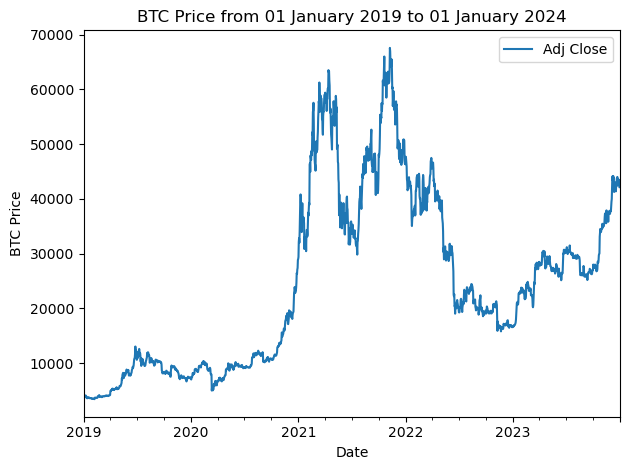

In [10]:
btc["Adj Close"].plot()
plt.ylabel("BTC Price")
plt.title("BTC Price from 01 January 2019 to 01 January 2024")
plt.tight_layout()
plt.legend()
plt.savefig("fig1.pdf",dpi=120)
plt.show()

This chart visualizes Bitcoin’s adjusted close price over the selected period, from January 2019 to January 2024.

**Key observations:**

**Early 2021 peak:** The price of Bitcoin saw an explosive rise in the first half of 2021, reaching its first peak of ~$60,000.

**Volatility in 2021-2022:** Following the initial surge, there’s another major peak around late 2021, after which the price experienced significant fluctuations.

**Post-2022 dip and recovery:** Bitcoin's price dropped notably in 2022 but began recovering steadily in late 2023 and into early 2024, suggesting potential market optimism or renewed interest in the cryptocurrency.

**Candlestick Plot**

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=btc.index,
                                     open=btc['Open'],
                                     high=btc['High'],
                                     low=btc['Low'],
                                     close=btc['Close'])])

fig.update_layout(title='Bitcoin Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()


The chart represents daily Bitcoin price fluctuations, showing highs, lows, open, and close prices for each day.

**Key Observations:**

Bitcoin exhibited a significant price increase from mid-2020 to late 2021, reaching its all-time high (near $70,000) around November 2021.

Post-peak, the price dropped sharply throughout 2022, bottoming near $20,000.

As of late 2023, Bitcoin is again rallying, trending upwards beyond $30,000, potentially indicating a recovery.

This chart also includes a small subplot displaying the price differences (perhaps daily or weekly) at the bottom.

**Price Volatility**

<Axes: title={'center': 'Daily Price Range (High - Low)'}, xlabel='Date', ylabel='Price Difference (USD)'>

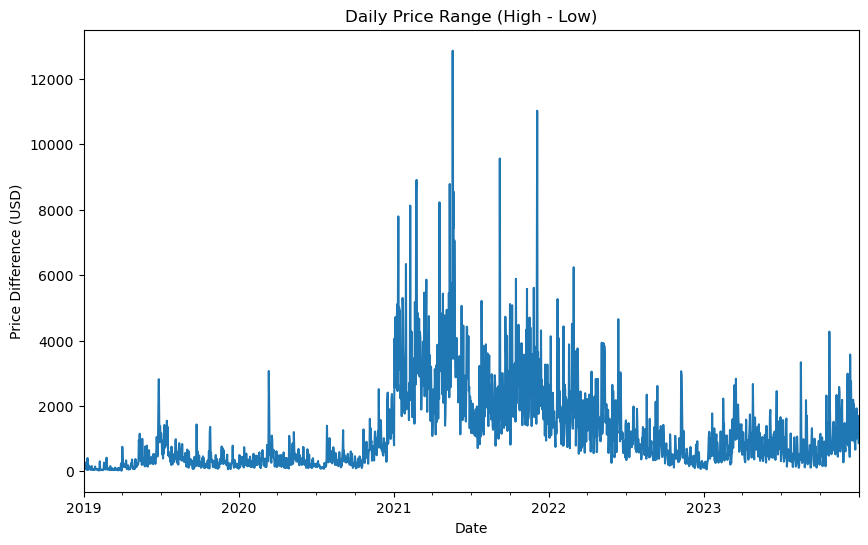

In [12]:
# Daily range (High - Low)
btc['Daily_Range'] = btc['High'] - btc['Low']

# Visualize daily range
btc['Daily_Range'].plot(figsize=(10,6), title='Daily Price Range (High - Low)', ylabel='Price Difference (USD)')


This chart highlights the daily price range (the difference between the daily high and low prices).

**Key observations:**

**Significant volatility around 2021-2022:** The most volatile period, indicated by spikes in the price range, occurred between 2021 and 2022, with some days seeing a price difference of over $10,000.

**Relatively stable range before 2021:** Prior to 2021, Bitcoin's daily price range was much lower, often under $2,000, reflecting a more stable market at the time.

**Volatility decline post-2022:** After 2022, the daily price range decreased, but occasional spikes still appear, indicating that Bitcoin retains elements of market unpredictability.

**Volume and Price Movement Correlation**

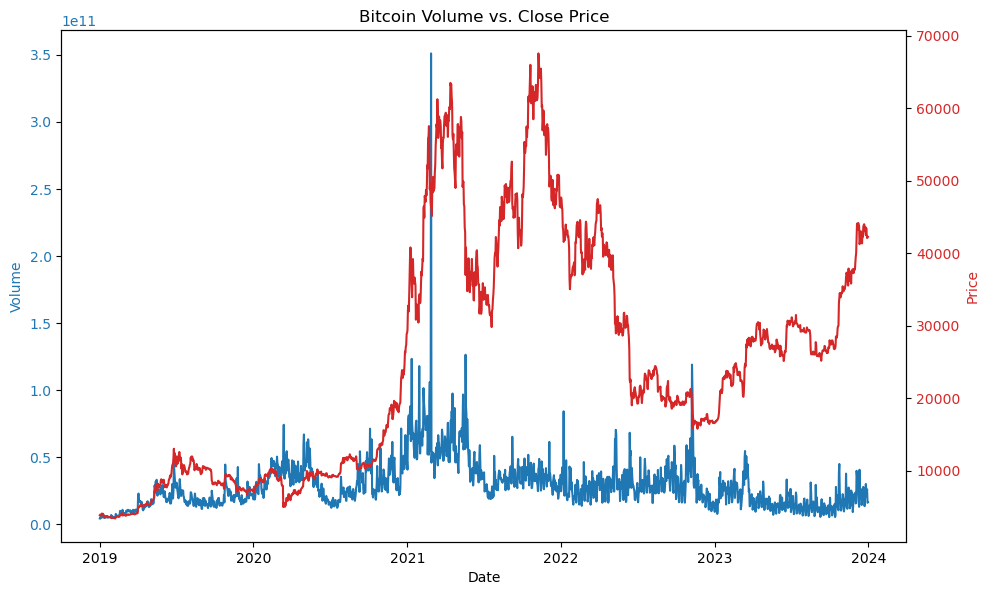

In [13]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='tab:blue')
ax1.plot(btc.index, btc['Volume'], color='tab:blue', label='Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Price', color='tab:red')
ax2.plot(btc.index, btc['Close'], color='tab:red', label='Close Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Bitcoin Volume vs. Close Price')
plt.show()


This dual-axis chart combines Bitcoin’s trading volume (blue) and close price (red).

**Key observations:**

**Volume spikes during price surges:** As expected, significant volume spikes are seen during periods of major price movements, particularly around the price peaks in 2021 and 2022. This indicates that high price activity typically draws in greater market participation.

**Volume tapering after peak:** After the 2021 peaks, volume generally declines but with intermittent spikes, suggesting that trading activity slows down during periods of price stagnation or decline but increases when there's a sudden price movement.

**Potential trend:** Trading volume shows some signs of correlation with price changes, but the relationship is more pronounced in moments of high volatility, particularly during the bullish run-up in 2021.


**Price Moving Averages and Volume Over Time**

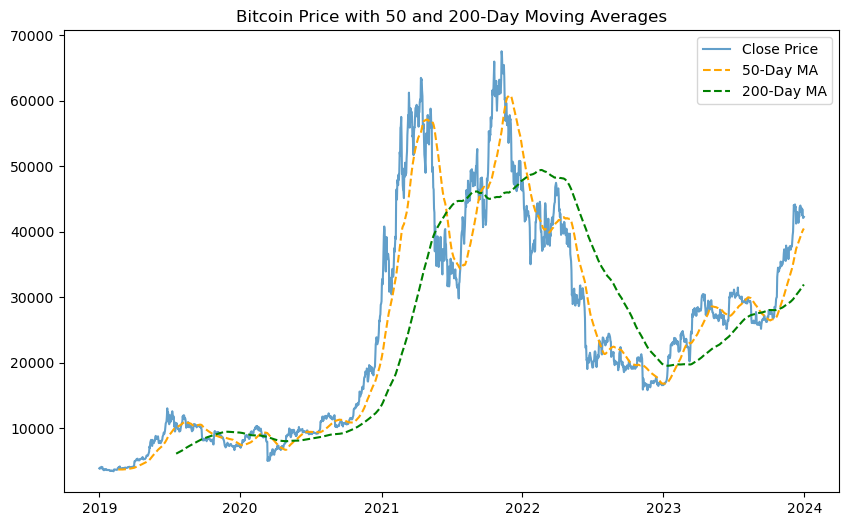

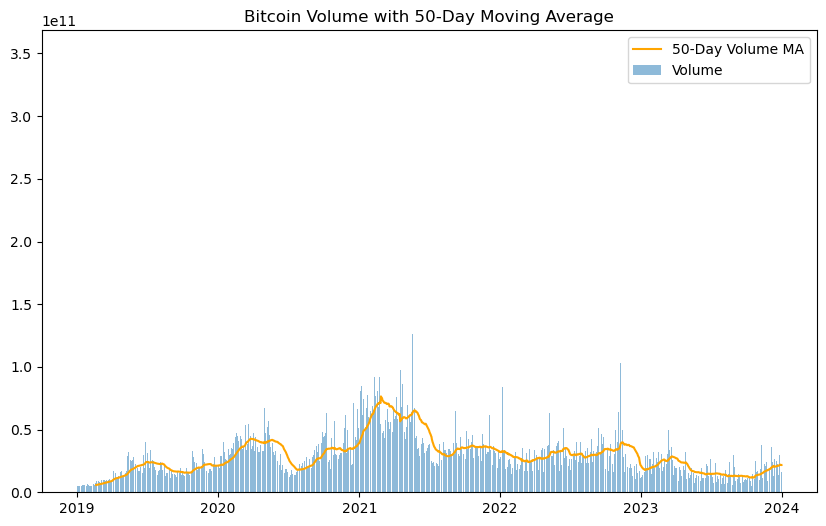

In [14]:
# Moving averages for price and volume
btc['MA50'] = btc['Close'].rolling(window=50).mean()
btc['MA200'] = btc['Close'].rolling(window=200).mean()
btc['Volume_MA50'] = btc['Volume'].rolling(window=50).mean()

# Plotting price and moving averages
plt.figure(figsize=(10,6))
plt.plot(btc['Close'], label='Close Price', alpha=0.7)
plt.plot(btc['MA50'], label='50-Day MA', color='orange', linestyle='--')
plt.plot(btc['MA200'], label='200-Day MA', color='green', linestyle='--')
plt.title('Bitcoin Price with 50 and 200-Day Moving Averages')
plt.legend()
plt.show()

# Plotting volume and its moving average
plt.figure(figsize=(10,6))
plt.bar(btc.index, btc['Volume'], label='Volume', alpha=0.5)
plt.plot(btc['Volume_MA50'], label='50-Day Volume MA', color='orange')
plt.title('Bitcoin Volume with 50-Day Moving Average')
plt.legend()
plt.show()


**Key Observations:**

The blue bars represent daily Bitcoin trading volume, with significant spikes during major price movements.

**Bullish and bearish trends:** Periods where the 50-day moving average crosses above the 200-day moving average (a golden cross) often signal bullish trends, while the opposite (death cross) signals bearish trends.

Bitcoin reached all-time highs in late 2021 (~$65,000–70,000) but experienced significant corrections afterward, including a bear market in 2022. It shows some recovery in 2023, with Bitcoin rising again in the second half of the year.

A clear increase in trading volume occurred during the bullish phase (2020–2021), followed by declining volumes as the price dropped in 2022.
The yellow line shows the 50-day moving average of volume. This smoother trend captures average volume trends, peaking around mid-2021 and then falling along with price.

In 2023, there appears to be a slight recovery in both price and volume.

**Daily Percent Change**

<Axes: title={'center': 'Daily Percentage Change (Open to Close)'}, xlabel='Date', ylabel='Percentage (%)'>

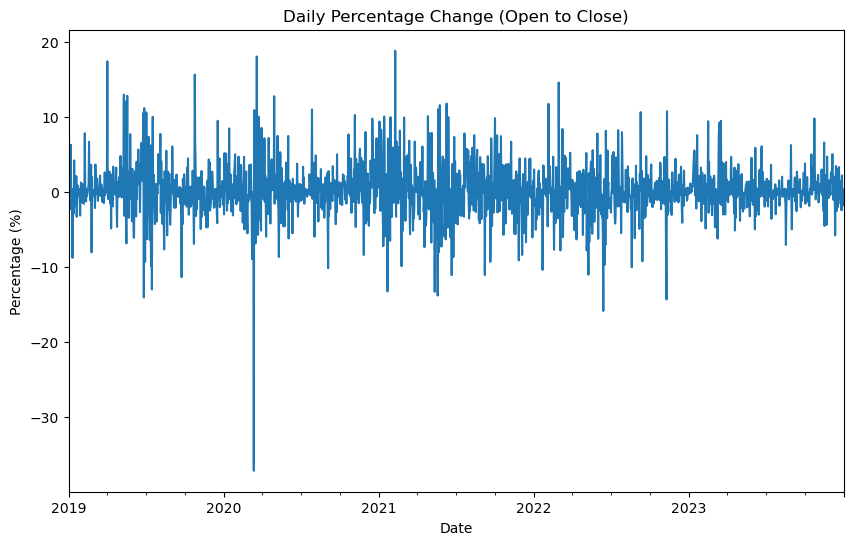

In [15]:
btc['Pct_Change'] = (btc['Close'] - btc['Open']) / btc['Open'] * 100

# Plotting daily percentage change
btc['Pct_Change'].plot(figsize=(10,6), title='Daily Percentage Change (Open to Close)', ylabel='Percentage (%)')


**Key Observations**

The daily volatility of Bitcoin is quite pronounced, with extreme swings, especially noticeable around the early 2020s when a dramatic drop of more than -30% occurred, likely related to the COVID-19 pandemic and its economic impact.

There are also numerous spikes of +10% and -10% on a daily basis, indicating high volatility across the time series.

In general, Bitcoin experiences rapid shifts in daily price percentage, a common characteristic of cryptocurrency markets, which tend to be more volatile than traditional equities or bonds.

**Adjusted Close Comparison**

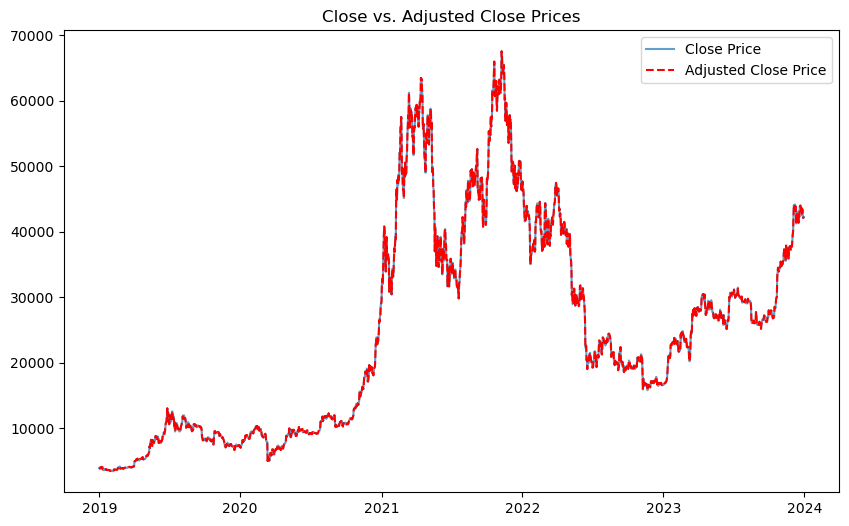

In [16]:
plt.figure(figsize=(10,6))
plt.plot(btc['Close'], label='Close Price', alpha=0.7)
plt.plot(btc['Adj Close'], label='Adjusted Close Price', linestyle='--', color='red')
plt.title('Close vs. Adjusted Close Prices')
plt.legend()
plt.show()


This Line chart compares close prices with adjusted close prices.

**Key Observations:**

The blue line represents Bitcoin's daily closing price, while the red dashed line is the adjusted close price (likely adjusted for dividends, splits, or other corporate actions, though dividends and splits don't directly apply to Bitcoin).

Both lines follow a similar trajectory: a steady increase leading up to Bitcoin’s all-time high in late 2021, followed by a sharp decline during 2022.
A new rally appears to have started in 2023, with the price climbing back toward $40,000.

There’s little deviation between the close and adjusted close prices, which is expected in a cryptocurrency that doesn't have traditional corporate adjustments.

**1(b) Building a predictive model to forecast the returns or volatilities of the selected security, ensuring that the labels highlight potential information leakage between training and test samples.**

In [17]:
data = btc.copy()
data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424   
2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  3836.741211   
2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  3857.717529   
2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  3845.194580   

                Volume  Daily_Range  MA50  MA200  Volume_MA50  Pct_Change  
Date                                                                       
2019-01-01  4324200990   143.682617   NaN    NaN          NaN    2.583775  
2019-01-02  5244856836   130.571777   NaN    NaN          NaN    2.447073  
2019-01-03  4530215219   109.462158   NaN    NaN          NaN   -2.399039  
2019-01-04  4847965467    82.080811   NaN    NaN          NaN    0.670074  
2019-01-05  5137609824    68.002930   NaN    NaN          NaN   -0.175995

In [18]:
data["Ret"] = data["Adj Close"].pct_change()
data = data[["Ret"]]
data.head()

Ret
Date                
2019-01-01       NaN
2019-01-02  0.025989
2019-01-03 -0.027050
2019-01-04  0.005467
2019-01-05 -0.003246

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ret     1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [20]:
data["Ret"] = data["Ret"].fillna(0)

In [21]:
# Calculate the compounded returns over different rolling windows
data["CompoundedRet4"] = data["Ret"].rolling(window=4).apply(lambda x: np.prod(1 + x / 100) - 1)
data["CompoundedRet8"] = data["Ret"].rolling(window=8).apply(lambda x: np.prod(1 + x / 100) - 1)
data["CompoundedRet12"] = data["Ret"].rolling(window=12).apply(lambda x: np.prod(1 + x / 100) - 1)
data["CompoundedRet15"] = data["Ret"].rolling(window=15).apply(lambda x: np.prod(1 + x / 100) - 1)
data["CompoundedRet20"] = data["Ret"].rolling(window=20).apply(lambda x: np.prod(1 + x / 100) - 1)

# Shift the 4-period compounded return to align with the prediction window
data["FutureCompoundedRet4"] = data["CompoundedRet4"].shift(-4)

# Set the output variable for predictive modeling
data["Output"] = data["FutureCompoundedRet4"]

# Clean up temporary columns
del data["FutureCompoundedRet4"]
del data["CompoundedRet4"]

# Remove any rows with missing values
data = data.dropna()

In [22]:
data.head()

Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
Date                                                                     
2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

            CompoundedRet20        Output  
Date                                       
2019-01-20        -0.000561  3.813801e-07  
2019-01-21        -0.000631  6.670496e-05  
2019-01-22        -0.000810 -5.630857e-06  
2019-01-23        -0.000594 -2.999060e-06  
2019-01-24        -0.000605 -3.636238e-04

In [23]:
data.tail()

Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
Date                                                                     
2023-12-23 -0.005872        0.000435         0.000610        -0.000057   
2023-12-24 -0.016539        0.000196         0.000394        -0.000123   
2023-12-25  0.013879        0.000542         0.000185         0.000004   
2023-12-26 -0.025055       -0.000013        -0.000096         0.000332   
2023-12-27  0.021694        0.000287         0.000375         0.000499   

            CompoundedRet20    Output  
Date                                   
2023-12-23         0.000966 -0.000060  
2023-12-24         0.000300 -0.000082  
2023-12-25        -0.000062 -0.000345  
2023-12-26        -0.000236 -0.000081  
2023-12-27         0.000084 -0.000272

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1803 entries, 2019-01-20 to 2023-12-27
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ret              1803 non-null   float64
 1   CompoundedRet8   1803 non-null   float64
 2   CompoundedRet12  1803 non-null   float64
 3   CompoundedRet15  1803 non-null   float64
 4   CompoundedRet20  1803 non-null   float64
 5   Output           1803 non-null   float64
dtypes: float64(6)
memory usage: 98.6 KB


In [25]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [26]:
X.head()

Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
Date                                                                     
2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

            CompoundedRet20  
Date                         
2019-01-20        -0.000561  
2019-01-21        -0.000631  
2019-01-22        -0.000810  
2019-01-23        -0.000594  
2019-01-24        -0.000605

In [27]:
y.head()

Date
2019-01-20    3.813801e-07
2019-01-21    6.670496e-05
2019-01-22   -5.630857e-06
2019-01-23   -2.999060e-06
2019-01-24   -3.636238e-04
Name: Output, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32, shuffle=True)

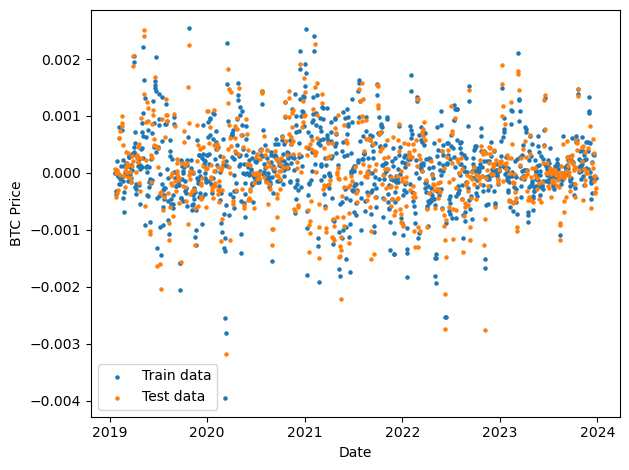

In [29]:
#Plot and Train the Leakage
plt.figure()
plt.scatter(y_train.index, y_train, s=5, label="Train data")
plt.scatter(y_test.index, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.tight_layout()
plt.legend()
plt.savefig("fig2.pdf",dpi=120)
plt.show()

***Check***

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RandomForestRegressor model
rf = RandomForestRegressor(max_depth=5, random_state=32)

# Fit the model
fitted_rf = rf.fit(X_train, y_train)

# Get predictions
y_pred = fitted_rf.predict(X_test)



# Define Mean Absolute Scaled Error (MASE)
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    MASE = MAE(predictions) / MAE(naive forecast)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the mean absolute error (MAE) of the predictions
    mae_pred = np.mean(np.abs(y_true - y_pred))

    # Calculate MAE for naive forecast (using the previous value as the forecast)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1]))  # Shifted by 1 step

    # Calculate MASE
    mase = mae_pred / mae_naive
    return mase

# Define Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    """
    MAPE = Mean(|(y_true - y_pred) / y_true|) * 100
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mase = mean_absolute_scaled_error(y_test, y_pred)

# Print all metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Scaled Error (MASE): {mase}")


Mean Absolute Error (MAE): 0.0005196549837933232
Mean Squared Error (MSE): 4.956211186221262e-07
Root Mean Squared Error (RMSE): 0.0007040036353756465
Mean Absolute Percentage Error (MAPE): 188.15294174320795
Mean Absolute Scaled Error (MASE): 0.7053917087225211


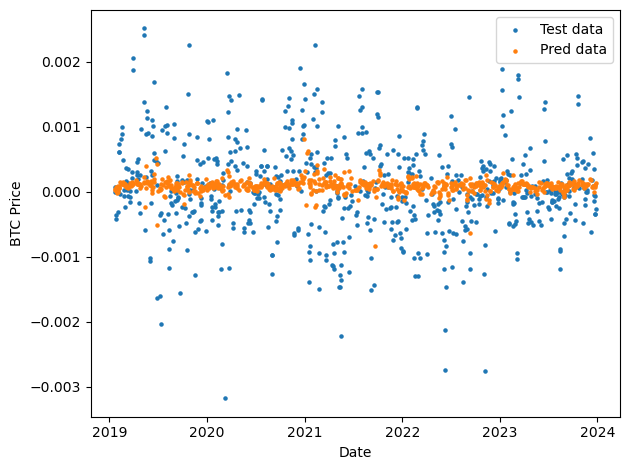

In [31]:
# Let's plot train and test splits to show leakage
plt.figure()
plt.scatter(y_test.index, y_test, s=5, label="Test data")
plt.scatter(y_test.index, y_pred, s=5, label="Pred data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.tight_layout()
plt.legend()
plt.savefig("fig3.pdf",dpi=120)
plt.show()

We introduce leakage which is intentionally using future information in your label creation process. This is what we think should be avoided in practice. We will this on our data and use future returns in the label for the current prediction then later in step 3 work without it for the model prediction.

## **1(c) (i): MLP**

In [32]:
data_1 = data.copy()
data_1.reset_index(inplace=True)
data_1.head()

Date       Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
0 2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
1 2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2 2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
3 2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
4 2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

   CompoundedRet20        Output  
0        -0.000561  3.813801e-07  
1        -0.000631  6.670496e-05  
2        -0.000810 -5.630857e-06  
3        -0.000594 -2.999060e-06  
4        -0.000605 -3.636238e-04

In [33]:
ts = int(0.4 * len(data_1))  # Number of observations in the test sample
split_time = len(data_1) - ts  # From this data we are in the test sample
test_time = data_1.iloc[split_time:, 0:1].values  # Keep the test sample dates
Ret_vector = data_1.iloc[split_time:, 1:2].values
data_1.head()

Date       Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
0 2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
1 2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2 2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
3 2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
4 2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

   CompoundedRet20        Output  
0        -0.000561  3.813801e-07  
1        -0.000631  6.670496e-05  
2        -0.000810 -5.630857e-06  
3        -0.000594 -2.999060e-06  
4        -0.000605 -3.636238e-04

In [34]:
data_1.tail()

Date       Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
1798 2023-12-23 -0.005872        0.000435         0.000610        -0.000057   
1799 2023-12-24 -0.016539        0.000196         0.000394        -0.000123   
1800 2023-12-25  0.013879        0.000542         0.000185         0.000004   
1801 2023-12-26 -0.025055       -0.000013        -0.000096         0.000332   
1802 2023-12-27  0.021694        0.000287         0.000375         0.000499   

      CompoundedRet20    Output  
1798         0.000966 -0.000060  
1799         0.000300 -0.000082  
1800        -0.000062 -0.000345  
1801        -0.000236 -0.000081  
1802         0.000084 -0.000272

In [35]:
Xdata, ydata = data_1.iloc[:, 1:-1], data_1.iloc[:, -1]
X = Xdata.astype("float32")
y = ydata.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, shuffle=False
)  # It is important to keep "shuffle=False"
n_features = X_train.shape[1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1082, 5) (721, 5) (1082,) (721,)


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)

mean_ret = np.mean(y_train)  # Useful to compute the performance = R2

scaler_output =  MinMaxScaler(feature_range=(-1, 1))
y_train = y_train.values.reshape(len(y_train), 1)
y_test = y_test.values.reshape(len(y_test), 1)
scaler_output.fit(y_train)
y_train = scaler_output.transform(y_train)
y_test = scaler_output.transform(y_test)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_shape = X_train.shape[1]

tf.random.set_seed(12345)

mlp_model = Sequential()
mlp_model.add(Dense(90, activation='relu', input_shape=(input_shape,)))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(85, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(60, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dense(1, activation="sigmoid"))

# Compile the model
hp_lr = 1e-5
adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)
mlp_model.compile(optimizer=adam, loss="mean_squared_error")

In [38]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 90)                  │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 85)                  │           7,735 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 85)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           5,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,932 (62.23 KB)

 Trainable params: 15,932 (62.23 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Validation and early stoppage
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

#Fitted model
mlp_history = mlp_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=2,
    callbacks=[es],
)

Epoch 1/100
14/14 - 4s - 283ms/step - loss: 0.1074 - val_loss: 0.1118
Epoch 2/100
14/14 - 0s - 12ms/step - loss: 0.1067 - val_loss: 0.1115
Epoch 3/100
14/14 - 0s - 12ms/step - loss: 0.1065 - val_loss: 0.1112
Epoch 4/100
14/14 - 0s - 24ms/step - loss: 0.1063 - val_loss: 0.1109
Epoch 5/100
14/14 - 0s - 9ms/step - loss: 0.1062 - val_loss: 0.1106
Epoch 6/100
14/14 - 0s - 13ms/step - loss: 0.1056 - val_loss: 0.1103
Epoch 7/100
14/14 - 0s - 13ms/step - loss: 0.1054 - val_loss: 0.1100
Epoch 8/100
14/14 - 0s - 9ms/step - loss: 0.1051 - val_loss: 0.1097
Epoch 9/100
14/14 - 0s - 9ms/step - loss: 0.1049 - val_loss: 0.1093
Epoch 10/100
14/14 - 0s - 12ms/step - loss: 0.1045 - val_loss: 0.1090
Epoch 11/100
14/14 - 0s - 10ms/step - loss: 0.1041 - val_loss: 0.1087
Epoch 12/100
14/14 - 0s - 9ms/step - loss: 0.1037 - val_loss: 0.1083
Epoch 13/100
14/14 - 0s - 9ms/step - loss: 0.1036 - val_loss: 0.1080
Epoch 14/100
14/14 - 0s - 9ms/step - loss: 0.1033 - val_loss: 0.1076
Epoch 15/100
14/14 - 0s - 10ms/ste

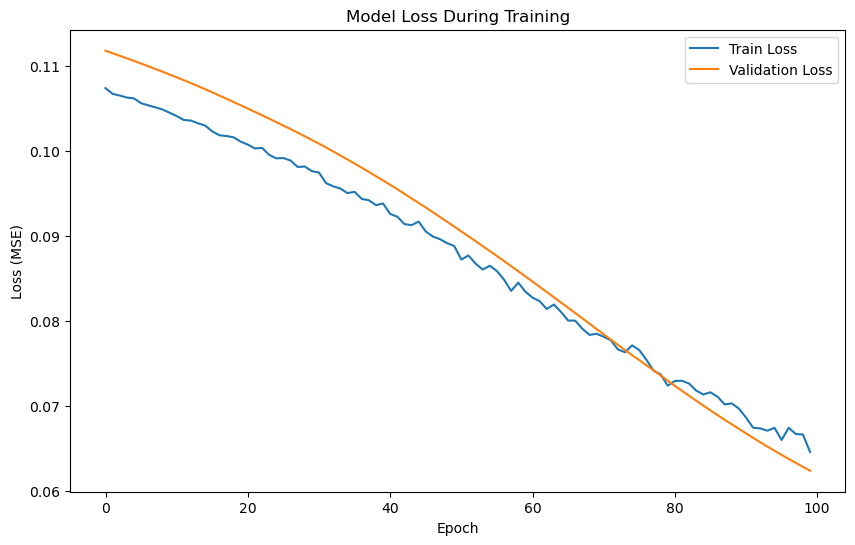

In [40]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


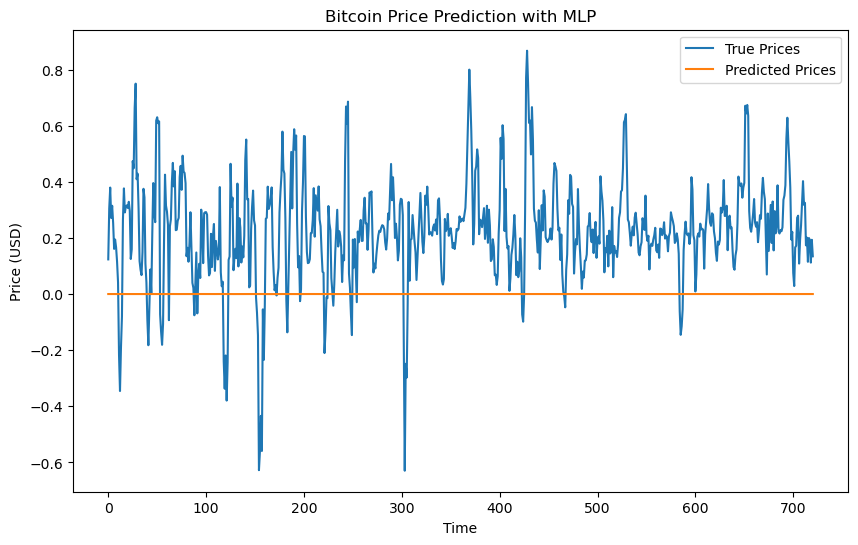

In [41]:
y_pred = mlp_model.predict(X_test)
y_pred = scaler_output.inverse_transform(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**1(d)(i) Backtest for MLP**

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Out-of-sample R-squared: -0.6478499216180476
Strategy Return = 1.2374401092529297 %
Buy and Hold Return = 1.206207275390625 %


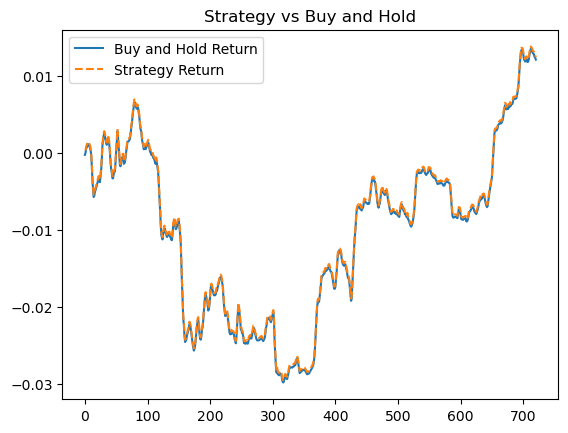

In [42]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_predicted.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = mlp_model.predict(X_test)  # MLP model prediction
y_test_pred = scaler_output.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output.inverse_transform(y_test)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()


**1(c)(ii): LSTM**

In [43]:
data_2 = data.copy()
data_2.reset_index(inplace=True)
data_2.head()

Date       Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
0 2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
1 2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2 2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
3 2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
4 2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

   CompoundedRet20        Output  
0        -0.000561  3.813801e-07  
1        -0.000631  6.670496e-05  
2        -0.000810 -5.630857e-06  
3        -0.000594 -2.999060e-06  
4        -0.000605 -3.636238e-04

In [44]:
data_2.tail()

Date       Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
1798 2023-12-23 -0.005872        0.000435         0.000610        -0.000057   
1799 2023-12-24 -0.016539        0.000196         0.000394        -0.000123   
1800 2023-12-25  0.013879        0.000542         0.000185         0.000004   
1801 2023-12-26 -0.025055       -0.000013        -0.000096         0.000332   
1802 2023-12-27  0.021694        0.000287         0.000375         0.000499   

      CompoundedRet20    Output  
1798         0.000966 -0.000060  
1799         0.000300 -0.000082  
1800        -0.000062 -0.000345  
1801        -0.000236 -0.000081  
1802         0.000084 -0.000272

In [45]:
data_2.reset_index(inplace=True, drop=True)

val_split = 0.4
#val_size = int(train_size * val_split)


window_size = 30

ts = int(0.4 * len(data_2))  # Number of observations in the test sample
split_time = len(data_2) - ts  # From this data we are in the test sample
test_time = data_2.iloc[split_time + window_size :, 0:1].values  # Keep the test sample dates

In [46]:
Xdata, ydata = data_2.iloc[:, 1:-1], data_2.iloc[:, -1]
X = Xdata.astype("float32")
y = ydata.astype("float32")

In [47]:
y_train_set = y[:split_time]
y_test_set = y[split_time:]

X_train_set = X[:split_time]
X_test_set = X[split_time:]

n_features = X_train_set.shape[1]

In [48]:
scaler_input =  MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train_set)
X_train_set_scaled = scaler_input.transform(X_train_set)
X_test_set_scaled = scaler_input.transform(X_test_set)

mean_ret = np.mean(y_train_set)

scaler_output = MinMaxScaler(feature_range=(-1, 1))
y_train_set = y_train_set.values.reshape(len(y_train_set), 1)
y_test_set = y_test_set.values.reshape(len(y_test_set), 1)
scaler_output.fit(y_train_set)
y_train_set_scaled = scaler_output.transform(y_train_set)

In [49]:
training_time = data_2.iloc[:split_time, 0:1].values

X_train = []
y_train = []

for i in range(window_size, y_train_set_scaled.shape[0]):
    X_train.append(X_train_set_scaled[i - window_size : i, :])
    y_train.append(y_train_set_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)

print("Training Data Shape", X_train.shape, y_train.shape)

X_test = []
y_test = y_test_set

for i in range(window_size, y_test_set.shape[0]):
    X_test.append(X_test_set_scaled[i - window_size : i, :])

X_test, y_test = np.array(X_test), np.array(y_test)

print("Test Data Shape", X_test.shape, y_test.shape)

Training Data Shape (1052, 30, 5) (1052, 1)
Test Data Shape (691, 30, 5) (721, 1)


In [50]:
SEED = 12345

units_lstm = 90 #70
units_lstm_2 = 85 #60
units_lstm_3 = 60 #50
units_lstm_4 = 32 #55

n_dropout = 0.20
act_fun = "relu"

from keras import Sequential
from keras.callbacks import EarlyStopping

lstm_model = Sequential()

lstm_model.add(
    LSTM(
        units=units_lstm,
        return_sequences=True,
        activation="tanh",
        input_shape=(X_train.shape[1], n_features),
    )
)
lstm_model.add(LSTM(units=units_lstm_2, return_sequences=True, activation="tanh"))
lstm_model.add(Dropout(n_dropout, seed=SEED))


lstm_model.add(LSTM(units=units_lstm_3, return_sequences=True, activation="tanh"))
lstm_model.add(Dropout(n_dropout, seed=SEED))


lstm_model.add(LSTM(units=units_lstm_4, return_sequences=False, activation="tanh"))
lstm_model.add(Dropout(n_dropout, seed=SEED))

lstm_model.add(Dense(units=16, activation=act_fun))
lstm_model.add(Dropout(n_dropout, seed=SEED))

lstm_model.add(Dense(units=10, activation=act_fun))
lstm_model.add(Dropout(n_dropout, seed=SEED))

lstm_model.add(Dense(1, activation="sigmoid"))

In [51]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 90)              │          34,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 85)              │          59,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 85)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 60)              │          35,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          11,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,053 (554.89 KB)

 Trainable params: 142,053 (554.89 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
hp_lr = 1e-5
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error"
)

es = EarlyStopping(
    monitor="val_loss", mode="min", verbose=0, patience=20, restore_best_weights=True
)

# fit the models
lstm_model.fit(
    X_train,
    y_train,
    validation_split=val_split,
    epochs=100,
    batch_size=64,
    verbose=2,
    callbacks=[es],
)

Epoch 1/100
10/10 - 13s - 1s/step - loss: 0.2780 - val_loss: 0.2846
Epoch 2/100
10/10 - 1s - 133ms/step - loss: 0.2773 - val_loss: 0.2837
Epoch 3/100
10/10 - 1s - 136ms/step - loss: 0.2762 - val_loss: 0.2831
Epoch 4/100
10/10 - 1s - 111ms/step - loss: 0.2757 - val_loss: 0.2826
Epoch 5/100
10/10 - 1s - 107ms/step - loss: 0.2751 - val_loss: 0.2821
Epoch 6/100
10/10 - 2s - 162ms/step - loss: 0.2745 - val_loss: 0.2816
Epoch 7/100
10/10 - 1s - 124ms/step - loss: 0.2743 - val_loss: 0.2810
Epoch 8/100
10/10 - 2s - 223ms/step - loss: 0.2735 - val_loss: 0.2804
Epoch 9/100
10/10 - 3s - 277ms/step - loss: 0.2730 - val_loss: 0.2798
Epoch 10/100
10/10 - 2s - 211ms/step - loss: 0.2722 - val_loss: 0.2791
Epoch 11/100
10/10 - 2s - 222ms/step - loss: 0.2713 - val_loss: 0.2783
Epoch 12/100
10/10 - 2s - 187ms/step - loss: 0.2709 - val_loss: 0.2775
Epoch 13/100
10/10 - 1s - 106ms/step - loss: 0.2706 - val_loss: 0.2767
Epoch 14/100
10/10 - 2s - 224ms/step - loss: 0.2686 - val_loss: 0.2758
Epoch 15/100
10/1

In [53]:
prediction = lstm_model.predict(X_test)
prediction = scaler_output.inverse_transform(prediction)
prediction = prediction.flatten()

values = np.array(y_test[window_size:])
values = values.flatten()


def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_predicted.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


R2_Campbell = R2_campbell(values, prediction, mean_ret)
print("Out-of-sample R-squared:", R2_Campbell)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
Out-of-sample R-squared: -0.07978781776072807


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


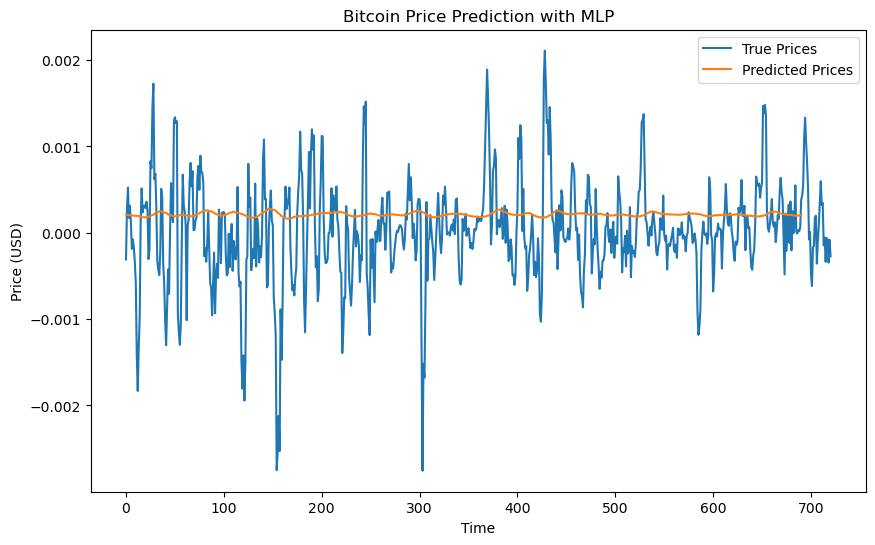

In [54]:
y_pred = lstm_model.predict(X_test)
y_pred = scaler_output.inverse_transform(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [55]:
#
LSTM_predictions = pd.DataFrame(
    {"Date": test_time.flatten(), "Pred LSTM": prediction, "Actual": values}
)
LSTM_predictions.head()

Date  Pred LSTM    Actual
0 2022-02-05   0.000211  0.000685
1 2022-02-06   0.000209  0.000276
2 2022-02-07   0.000206 -0.000327
3 2022-02-08   0.000204 -0.000429
4 2022-02-09   0.000203 -0.000490

In [56]:
LSTM_predictions.tail()

Date  Pred LSTM    Actual
686 2023-12-23   0.000201 -0.000060
687 2023-12-24   0.000200 -0.000082
688 2023-12-25   0.000202 -0.000345
689 2023-12-26   0.000203 -0.000081
690 2023-12-27   0.000204 -0.000272

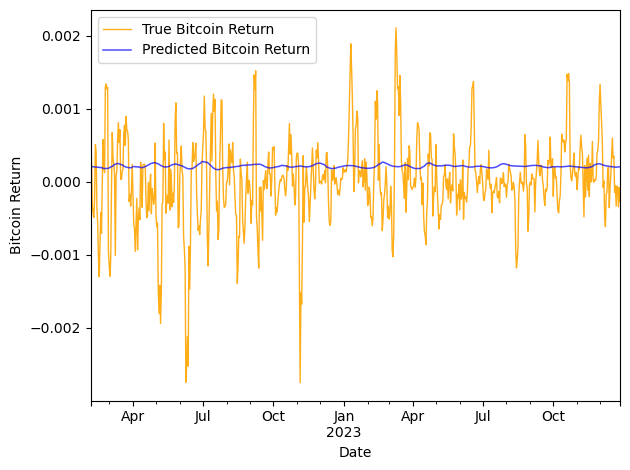

In [57]:
fig = plt.figure()
ax = plt.gca()
LSTM_predictions.plot(x="Date", y="Actual", color="orange", label="True Bitcoin Return", lw=1,alpha = 0.9, ax=ax)
LSTM_predictions.plot(x="Date", y="Pred LSTM", color="blue", label="Predicted Bitcoin Return", lw=1.1,alpha = 0.7, ax=ax)
plt.xlabel("Date")
plt.ylabel("Bitcoin Return")
plt.tight_layout()
plt.legend()
plt.savefig("fig5.pdf",dpi=120)
plt.show()

**1(c)(iii): CNN based on GAF**

In [58]:
data_3 = data.copy()
#data_3.reset_index(inplace=True)
data_3.head()

Ret  CompoundedRet8  CompoundedRet12  CompoundedRet15  \
Date                                                                     
2019-01-20 -0.034210       -0.000142        -0.001062        -0.000573   
2019-01-21 -0.006937        0.000084        -0.001142        -0.001243   
2019-01-22  0.007982       -0.000267        -0.000180        -0.001038   
2019-01-23 -0.005397       -0.000117        -0.000256        -0.001105   
2019-01-24  0.004391       -0.000140        -0.000142        -0.001073   

            CompoundedRet20        Output  
Date                                       
2019-01-20        -0.000561  3.813801e-07  
2019-01-21        -0.000631  6.670496e-05  
2019-01-22        -0.000810 -5.630857e-06  
2019-01-23        -0.000594 -2.999060e-06  
2019-01-24        -0.000605 -3.636238e-04

In [59]:
Xdata = data_3.iloc[:, 5]

(1763, 40)


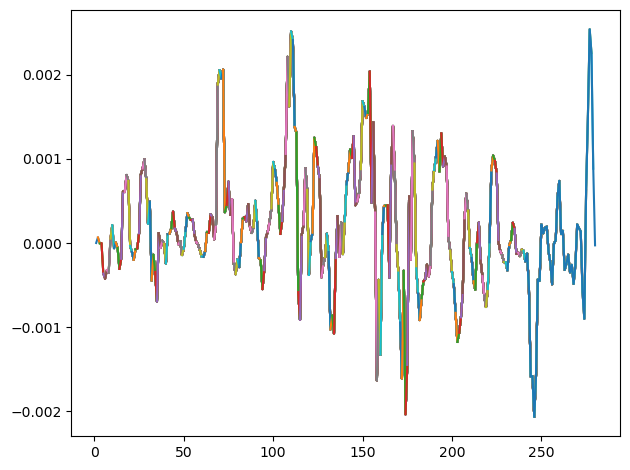

In [60]:
X_train = []
window_size = 40
for i in range(window_size, Xdata.shape[0]):
    X_train.append(Xdata[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure()
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])
plt.tight_layout()
#plt.legend()
plt.savefig("fig6.pdf",dpi=120)
plt.show()

In [61]:
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1763, 40, 40)


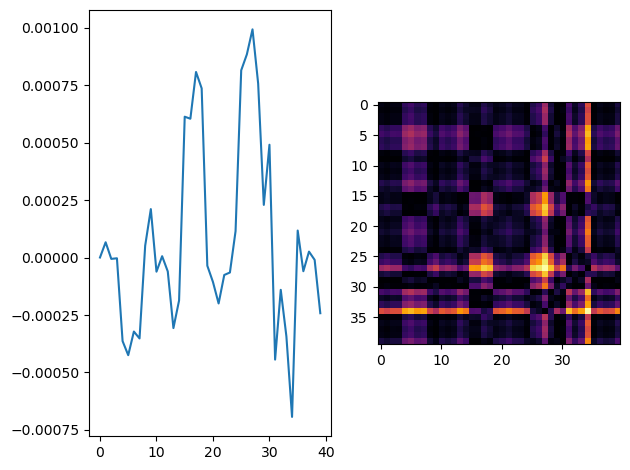

(40, 40)


In [62]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="inferno")
plt.tight_layout()
#plt.legend()
plt.savefig("fig7.pdf",dpi=120)
plt.show()
print(X_train_new[0].shape)

In [63]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdata.shape[0] - window_size):
    y_data.append(Xdata[i] < Xdata[i + window_size])
y_data = np.array(y_data)
y_data.shape

(1723,)

In [64]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1723, 40, 40)

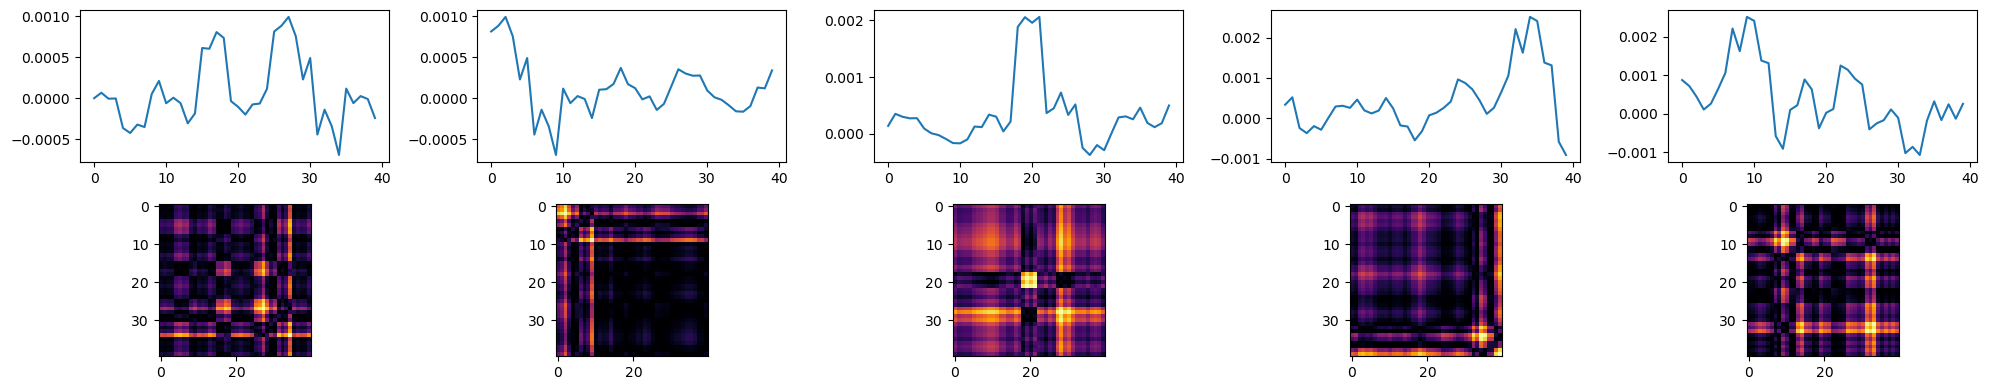

In [65]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "inferno")
plt.tight_layout()
#plt.legend()
plt.savefig("fig8.pdf",dpi=120)
plt.show()

In [66]:
# Split into train and test
train_split = 0.6 #i.e test = 0.4 as previous cases as in MLP and LSTM
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [67]:
cnn_model = tf.keras.Sequential()
# Input layer
cnn_model.add(tf.keras.layers.InputLayer(input_shape=(40, 40, 1)))
cnn_model.add(tf.keras.layers.Conv2D(90, 3, activation="relu"))
cnn_model.add(tf.keras.layers.MaxPooling2D(2))
cnn_model.add(tf.keras.layers.Conv2D(85, 3, activation="relu"))
cnn_model.add(tf.keras.layers.MaxPooling2D(2))
cnn_model.add(tf.keras.layers.Conv2D(60, 3, activation="relu"))
cnn_model.add(tf.keras.layers.MaxPooling2D(2))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(32, activation="relu"))
cnn_model.add(tf.keras.layers.Dropout(0.5, seed=1234))
cnn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [68]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 38, 90)          │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 19, 90)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 85)          │          68,935 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 85)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 60)            │          45,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 60)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │          17,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,140 (520.08 KB)

 Trainable params: 133,140 (520.08 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
np.mean(y_data_train)

0.5072604065827686

In [71]:
cnn_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"])

es = EarlyStopping(
    monitor="val_loss", mode="min", verbose=0, patience=20, restore_best_weights=True
)

cnn_history = cnn_model.fit(
    x=X_data_train,
    y=y_data_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=100,
    batch_size=64,
    verbose=2,
    callbacks=[es],
)

Epoch 1/100
13/13 - 8s - 580ms/step - accuracy: 0.5024 - loss: 4.4257 - val_accuracy: 0.5604 - val_loss: 1.6456
Epoch 2/100
13/13 - 4s - 331ms/step - accuracy: 0.5012 - loss: 3.6362 - val_accuracy: 0.5556 - val_loss: 1.5034
Epoch 3/100
13/13 - 4s - 298ms/step - accuracy: 0.5218 - loss: 3.0691 - val_accuracy: 0.5652 - val_loss: 1.3901
Epoch 4/100
13/13 - 3s - 202ms/step - accuracy: 0.5387 - loss: 3.0057 - val_accuracy: 0.5700 - val_loss: 1.2754
Epoch 5/100
13/13 - 1s - 98ms/step - accuracy: 0.5145 - loss: 2.4340 - val_accuracy: 0.5507 - val_loss: 1.1509
Epoch 6/100
13/13 - 1s - 94ms/step - accuracy: 0.5254 - loss: 2.0547 - val_accuracy: 0.5652 - val_loss: 1.0869
Epoch 7/100
13/13 - 1s - 95ms/step - accuracy: 0.5375 - loss: 1.9275 - val_accuracy: 0.5459 - val_loss: 1.0359
Epoch 8/100
13/13 - 1s - 93ms/step - accuracy: 0.5036 - loss: 1.8732 - val_accuracy: 0.5507 - val_loss: 0.9870
Epoch 9/100
13/13 - 1s - 91ms/step - accuracy: 0.5375 - loss: 1.6032 - val_accuracy: 0.5507 - val_loss: 0.94

In [72]:

acc = cnn_model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5030 - loss: 0.7553
Accuracy over validation: 50.72%


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


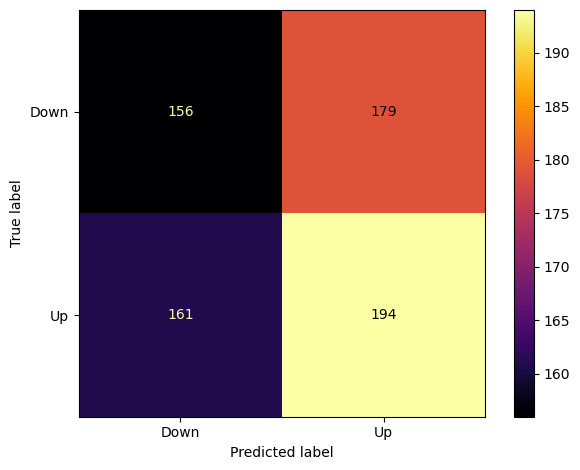

              precision    recall  f1-score   support

       False       0.49      0.47      0.48       335
        True       0.52      0.55      0.53       355

    accuracy                           0.51       690
   macro avg       0.51      0.51      0.51       690
weighted avg       0.51      0.51      0.51       690



In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_prob = cnn_model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="inferno")
plt.tight_layout()
#plt.legend()
plt.savefig("fig9.pdf",dpi=120)
plt.show()
print(classification_report(y_data_test, y_pred))

In [ ]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = lstm_model2.predict(X_test_lstm2)  # MLP model prediction
y_test_pred = scaler_output2l.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test_lstm2[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output2l.inverse_transform(y_test_lstm2)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()

**1(d)(ii): Backtest for LSTM**

Strat Return = 0.9852170944213867 %
Buy and Hold Return = 1.0543227195739746 %


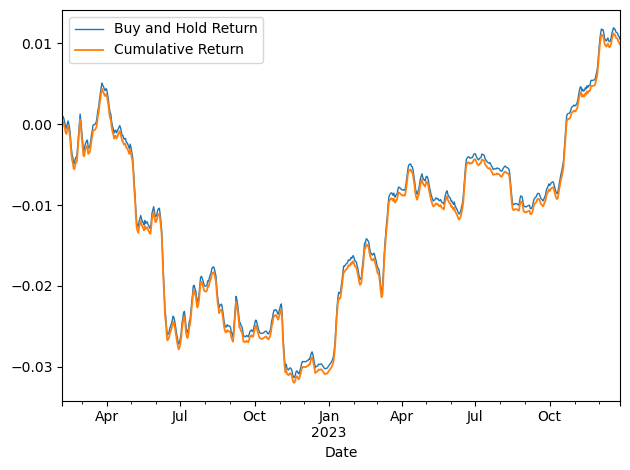

In [75]:
LSTM_predictions["Positions"] = LSTM_predictions["Pred LSTM"].apply(np.sign)
LSTM_predictions["Strat_ret"] = (
    LSTM_predictions["Positions"].shift(1) * LSTM_predictions["Actual"]
)
LSTM_predictions["Cumulative Return"] = (
    LSTM_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
)
LSTM_predictions["Buy and Hold Return"] = (
    LSTM_predictions["Actual"].expanding().apply(lambda x: np.prod(1 + x) - 1)
)

Final_Return = np.prod(1 + LSTM_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + LSTM_predictions["Actual"]) - 1

print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

fig = plt.figure()

ax = plt.gca()
LSTM_predictions.plot(x="Date", y="Buy and Hold Return",  lw=1,ax=ax)
LSTM_predictions.plot(x="Date", y="Cumulative Return",  lw=1.3,ax=ax)
plt.tight_layout()
plt.legend()
plt.savefig("fig11.pdf",dpi=120)
plt.show()

 **1(d)(ii): Backtest for LSTM**

Strat Return = 44.17952434198826 %
Buy and Hold Return = 33.26357538944114 %


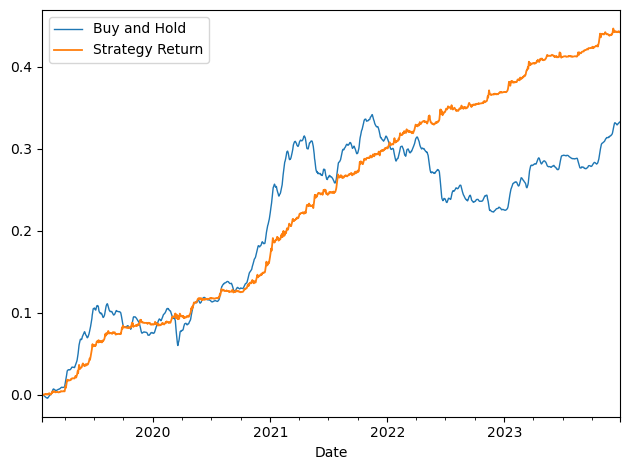

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Apply strategy to CNN predictions
data_3["Positions"] = data_3["Ret"].apply(np.sign)  # Buy (1) or Sell (-1) # Changed column from 'Pred CNN' to 'Ret'
# Changed 'Actual' column to "CompoundedRet8"
data_3["Strat_ret"] = data_3["Positions"].shift(1) * data_3["CompoundedRet8"]  # Strategy returns

# Step 2: Compute cumulative returns
data_3["CumRet"] = data_3["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)  # Cumulative returns of the strategy
# Changed 'Actual' column to "CompoundedRet8"
data_3["bhRet"] = data_3["CompoundedRet8"].expanding().apply(lambda x: np.prod(1 + x) - 1)  # Buy and hold returns

# Step 3: Calculate final returns
Final_Return = np.prod(1 + data_3["Strat_ret"]) - 1
# Changed 'Actual' column to "CompoundedRet8"
Buy_Return = np.prod(1 + data_3["CompoundedRet8"]) - 1

# Print the results
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

# Step 4: Plot the performance
fig = plt.figure()
ax = plt.gca()

# Check if 'Date' column exists. If not, use index instead
if 'Date' in data_3.columns:
  data_3.plot(x="Date", y="bhRet", lw=1, ax=ax, label="Buy and Hold")
  data_3.plot(x="Date", y="CumRet", lw=1.3, ax=ax, label="Strategy Return")
else:
  data_3.plot(y="bhRet", lw=1, ax=ax, label="Buy and Hold")
  data_3.plot(y="CumRet", lw=1.3, ax=ax, label="Strategy Return")

plt.tight_layout()
plt.legend()
plt.savefig("CNN_backtest_results.pdf", dpi=120)
plt.show()

# **Step 2**

**2a**

In [79]:
data_step2 = btc.copy()
data_step2["Ret"] = data_step2["Adj Close"].pct_change().shift(1)
data_step2["Ret"] = data_step2["Ret"].fillna(0)

data_step2 = data_step2[["Ret"]]
#data_step2["Output"] = data_step2["Ret"]
#del data_step2["Ret"]
data_step2.head()




Ret
Date                
2019-01-01  0.000000
2019-01-02  0.000000
2019-01-03  0.025989
2019-01-04 -0.027050
2019-01-05  0.005467

In [80]:
n_lags = 100

for i in range(1, n_lags + 1):
    name = "Ret_" + str(i)
    data_step2[name] = data_step2["Ret"].shift(i)

data_step2["Ret4_i"] = data_step2["Ret"].rolling(4).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))

data_step2["Output"] = data_step2["Ret"]

del data_step2["Ret"]
del data_step2["Ret4_i"]

data_step2 = data_step2.dropna()
data_step2.head()

Ret_1     Ret_2     Ret_3     Ret_4     Ret_5     Ret_6  \
Date                                                                     
2019-04-11 -0.016033  0.017479  0.027487  0.004594  0.023134 -0.010099   
2019-04-12  0.022977 -0.016033  0.017479  0.027487  0.004594  0.023134   
2019-04-13 -0.048842  0.022977 -0.016033  0.017479  0.027487  0.004594   
2019-04-14  0.004946 -0.048842  0.022977 -0.016033  0.017479  0.027487   
2019-04-15  0.001385  0.004946 -0.048842  0.022977 -0.016033  0.017479   

               Ret_7     Ret_8     Ret_9    Ret_10  ...    Ret_92    Ret_93  \
Date                                                ...                       
2019-04-11  0.019087  0.173560  0.012856 -0.000306  ...  0.001391 -0.012605   
2019-04-12 -0.010099  0.019087  0.173560  0.012856  ...  0.001104  0.001391   
2019-04-13  0.023134 -0.010099  0.019087  0.173560  ... -0.088314  0.001104   
2019-04-14  0.004594  0.023134 -0.010099  0.019087  ...  0.002294 -0.088314   
2019-04-15  0.027487  0.004594  0.023134 -0.010099  ... -0.007069  0.002294   

              Ret_94    Ret_95    Ret_96    Ret_97    Ret_98    Ret_99  \
Date                                                                     
2019-04-11  0.060189 -0.003246  0.005467 -0.027050  0.025989  0.000000   
2019-04-12 -0.012605  0.060189 -0.003246  0.005467 -0.027050  0.025989   
2019-04-13  0.001391 -0.012605  0.060189 -0.003246  0.005467 -0.027050   
2019-04-14  0.001104  0.001391 -0.012605  0.060189 -0.003246  0.005467   
2019-04-15 -0.088314  0.001104  0.001391 -0.012605  0.060189 -0.003246   

             Ret_100    Output  
Date                            
2019-04-11  0.000000  0.022977  
2019-04-12  0.000000 -0.048842  
2019-04-13  0.025989  0.004946  
2019-04-14 -0.027050  0.001385  
2019-04-15  0.005467  0.013958  

[5 rows x 101 columns]

**2bi**.

**MLP**



In [81]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField

# Reset index for data
data_step2.reset_index(inplace=True, drop=True)

### Parameters for walk-forward validation ###
window_size = 500  # Training window size
test_window_size = 100  # Test window size for Part c
val_split = 0.4

# X and y from the dataset (assuming X is features and y is target)
Xdata, ydata = data_step2.iloc[:, 1:-1], data_step2.iloc[:, -1]
X2 = Xdata.astype("float32")
y2 = ydata.astype("float32")

# Scale data
scaler_input2 = MinMaxScaler(feature_range=(-1, 1))
scaler_output2 = MinMaxScaler(feature_range=(-1, 1))

X_scaled2 = scaler_input2.fit_transform(X2)
y_scaled2 = scaler_output2.fit_transform(y2.values.reshape(-1, 1))

# Walk-forward validation function
def walk_forward_validation(X_scaled, y_scaled, window_size, test_size=100):
    # Split dataset into multiple windows
    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train2 = X_scaled[i - window_size:i]
        y_train2 = y_scaled[i - window_size:i]

        X_test2 = X_scaled[i:i + test_size]
        y_test2 = y_scaled[i:i + test_size]

        yield X_train2, y_train2, X_test2, y_test2


#Validation and early stoppage
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

# Loop through each fold in walk-forward validation
for X_train2, y_train2, X_test2, y_test2 in walk_forward_validation(X_scaled2, y_scaled2, window_size):

    # Dynamically build the MLP model based on the input shape
    mlp_model2 = Sequential()
    mlp_model2.add(Dense(90, activation='relu', input_shape=(X_train2.shape[1],)))  # Input shape dynamically set
    mlp_model2.add(Dropout(0.2))
    mlp_model2.add(Dense(85, activation='relu'))
    mlp_model2.add(Dropout(0.2))
    mlp_model2.add(Dense(60, activation='relu'))
    mlp_model2.add(Dropout(0.2))
    mlp_model2.add(Dense(32, activation='relu'))
    mlp_model2.add(Dropout(0.2))
    mlp_model2.add(Dense(16, activation='relu'))
    mlp_model2.add(Dense(1, activation="sigmoid"))

    # Compile the model
    hp_lr = 1e-5
    adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)
    mlp_model2.compile(optimizer=adam, loss="mean_squared_error")

    # Train the model
    mlp_histroy2 = mlp_model2.fit(
        X_train2,
        y_train2,
        validation_split=val_split,
        epochs=100,
        batch_size=64,
        verbose=2,
        callbacks=[es],
    )

    # Evaluate the model
    loss = mlp_model2.evaluate(X_test2, y_test2, verbose=0)
    print(f"Test Loss: {loss}")


Epoch 1/100
5/5 - 3s - 668ms/step - loss: 0.0681 - val_loss: 0.0762
Epoch 2/100
5/5 - 0s - 24ms/step - loss: 0.0678 - val_loss: 0.0751
Epoch 3/100
5/5 - 0s - 28ms/step - loss: 0.0681 - val_loss: 0.0741
Epoch 4/100
5/5 - 0s - 19ms/step - loss: 0.0678 - val_loss: 0.0731
Epoch 5/100
5/5 - 0s - 23ms/step - loss: 0.0668 - val_loss: 0.0721
Epoch 6/100
5/5 - 0s - 21ms/step - loss: 0.0644 - val_loss: 0.0711
Epoch 7/100
5/5 - 0s - 24ms/step - loss: 0.0635 - val_loss: 0.0701
Epoch 8/100
5/5 - 0s - 26ms/step - loss: 0.0649 - val_loss: 0.0691
Epoch 9/100
5/5 - 0s - 24ms/step - loss: 0.0673 - val_loss: 0.0681
Epoch 10/100
5/5 - 0s - 22ms/step - loss: 0.0599 - val_loss: 0.0672
Epoch 11/100
5/5 - 0s - 21ms/step - loss: 0.0595 - val_loss: 0.0663
Epoch 12/100
5/5 - 0s - 21ms/step - loss: 0.0606 - val_loss: 0.0653
Epoch 13/100
5/5 - 0s - 35ms/step - loss: 0.0595 - val_loss: 0.0644
Epoch 14/100
5/5 - 0s - 22ms/step - loss: 0.0587 - val_loss: 0.0635
Epoch 15/100
5/5 - 0s - 23ms/step - loss: 0.0581 - val_l

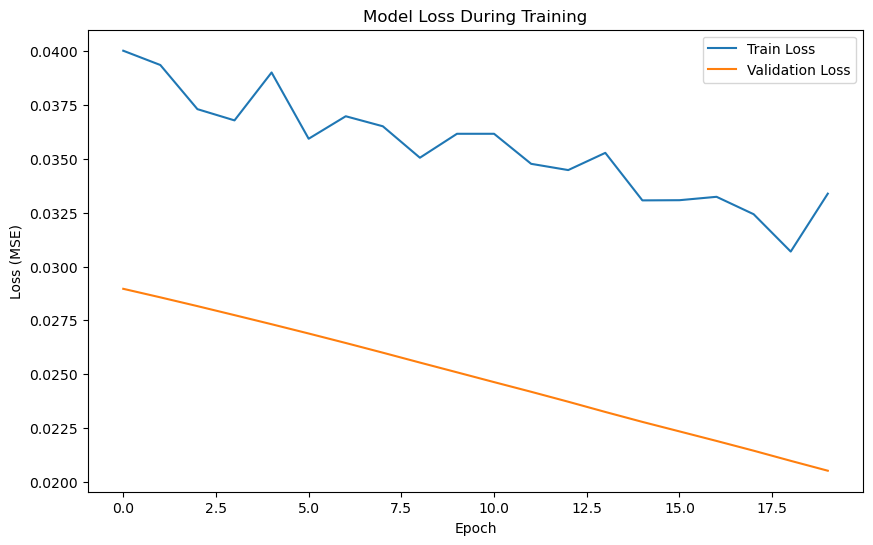

In [82]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(mlp_histroy2.history['loss'], label='Train Loss')
plt.plot(mlp_histroy2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


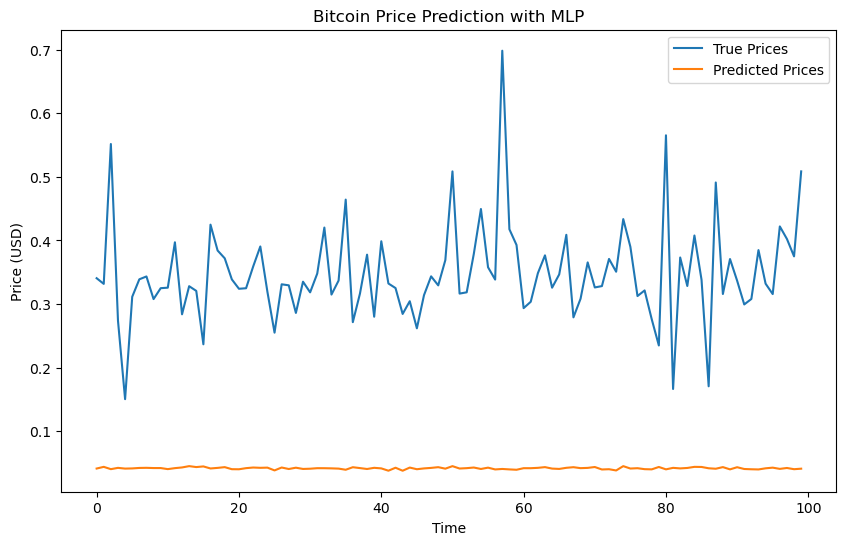

In [83]:
y_pred = mlp_model2.predict(X_test2)
y_pred = scaler_output2.inverse_transform(y_pred)


plt.figure(figsize=(10, 6))
plt.plot(y_test2, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Out-of-sample R-squared: -493.8809573852521
Strategy Return = 60.90675592422485 %
Buy and Hold Return = 61.40936613082886 %


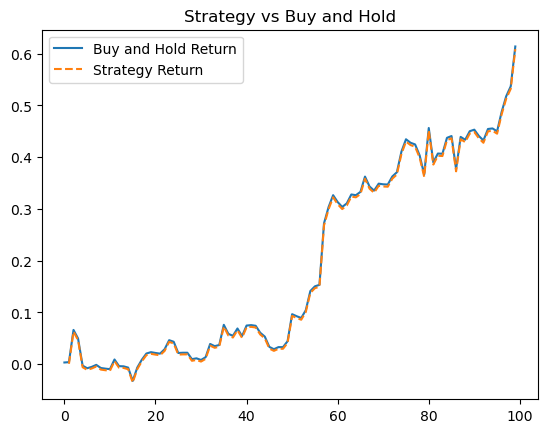

In [84]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = mlp_model2.predict(X_test2)  # MLP model prediction
y_test_pred = scaler_output2.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test2[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output2.inverse_transform(y_test2)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()


**2bii**

**LSTM**

In [85]:
import numpy as np

# Walk-forward validation function modified for LSTM input data
scaler_input2l = MinMaxScaler(feature_range=(-1, 1))
scaler_output2l = MinMaxScaler(feature_range=(-1, 1))

X_scaled2 = scaler_input2l.fit_transform(X)
y_scaled2 = scaler_output2l.fit_transform(y.values.reshape(-1, 1))
# Walk-forward validation function modified for LSTM input data
def walk_forward_validation_lstm(X_scaled, y_scaled, window_size, test_size):
    timesteps = 1  # Assuming 1 timestep for each instance, modify if needed
    features = X_scaled.shape[1]

    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train_lstm2 = X_scaled[i - window_size:i]
        y_train_lstm2 = y_scaled[i - window_size:i]

        X_test_lstm2 = X_scaled[i:i + test_size]
        y_test_lstm2 = y_scaled[i:i + test_size]

        # Reshape for LSTM: (samples, timesteps, features)
        X_train_lstm2 = np.reshape(X_train_lstm2, (X_train_lstm2.shape[0], timesteps, features))
        X_test_lstm2 = np.reshape(X_test_lstm2, (X_test_lstm2.shape[0], timesteps, features))

        yield X_train_lstm2, y_train_lstm2, X_test_lstm2, y_test_lstm2


SEED = 12345

units_lstm = 90 #70
units_lstm_2 = 85 #60
units_lstm_3 = 60 #50
units_lstm_4 = 32 #55

n_dropout = 0.20
act_fun = "relu"

from keras import Sequential
from keras.callbacks import EarlyStopping

lstm_model2 = Sequential()

lstm_model2.add(
    LSTM(
        units=units_lstm,
        return_sequences=True,
        activation="tanh",
        input_shape=(X_train.shape[1], n_features),
    )
)
lstm_model2.add(LSTM(units=units_lstm_2, return_sequences=True, activation="tanh"))
lstm_model2.add(Dropout(n_dropout, seed=SEED))


lstm_model2.add(LSTM(units=units_lstm_3, return_sequences=True, activation="tanh"))
lstm_model2.add(Dropout(n_dropout, seed=SEED))


lstm_model2.add(LSTM(units=units_lstm_4, return_sequences=False, activation="tanh"))
lstm_model2.add(Dropout(n_dropout, seed=SEED))

lstm_model2.add(Dense(units=16, activation=act_fun))
lstm_model2.add(Dropout(n_dropout, seed=SEED))

lstm_model2.add(Dense(units=10, activation=act_fun))
lstm_model2.add(Dropout(n_dropout, seed=SEED))

lstm_model2.add(Dense(1, activation="sigmoid"))

hp_lr = 1e-5
lstm_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error"
)

es = EarlyStopping(
    monitor="val_loss", mode="min", verbose=0, patience=20, restore_best_weights=True
)

# Set parameters for walk-forward validation
window_size = 500  # Size of the training window
test_window_size = 100  # Size of the test window

# Loop through each fold in walk-forward validation
for X_train_lstm2, y_train_lstm2, X_test_lstm2, y_test_lstm2 in walk_forward_validation_lstm(X_scaled2, y_scaled2, window_size, test_window_size):

    lstm_histroy2 = lstm_model2.fit(
      X_train_lstm2,
      y_train_lstm2,
      validation_split=val_split,
      epochs=100,
      batch_size=64,
      verbose=2,
      callbacks=[es],
    )

    # Evaluate the model
    loss = lstm_model2.evaluate(X_test_lstm2, y_test_lstm2, verbose=0)
    print(f"Test Loss: {loss}")


Epoch 1/100
5/5 - 11s - 2s/step - loss: 0.2823 - val_loss: 0.2832
Epoch 2/100
5/5 - 0s - 29ms/step - loss: 0.2823 - val_loss: 0.2831
Epoch 3/100
5/5 - 0s - 25ms/step - loss: 0.2822 - val_loss: 0.2831
Epoch 4/100
5/5 - 0s - 33ms/step - loss: 0.2822 - val_loss: 0.2830
Epoch 5/100
5/5 - 0s - 29ms/step - loss: 0.2821 - val_loss: 0.2830
Epoch 6/100
5/5 - 0s - 27ms/step - loss: 0.2821 - val_loss: 0.2829
Epoch 7/100
5/5 - 0s - 26ms/step - loss: 0.2820 - val_loss: 0.2829
Epoch 8/100
5/5 - 0s - 28ms/step - loss: 0.2819 - val_loss: 0.2828
Epoch 9/100
5/5 - 0s - 27ms/step - loss: 0.2819 - val_loss: 0.2827
Epoch 10/100
5/5 - 0s - 27ms/step - loss: 0.2818 - val_loss: 0.2827
Epoch 11/100
5/5 - 0s - 28ms/step - loss: 0.2818 - val_loss: 0.2826
Epoch 12/100
5/5 - 0s - 26ms/step - loss: 0.2817 - val_loss: 0.2826
Epoch 13/100
5/5 - 0s - 26ms/step - loss: 0.2817 - val_loss: 0.2825
Epoch 14/100
5/5 - 0s - 27ms/step - loss: 0.2816 - val_loss: 0.2825
Epoch 15/100
5/5 - 0s - 27ms/step - loss: 0.2816 - val_los

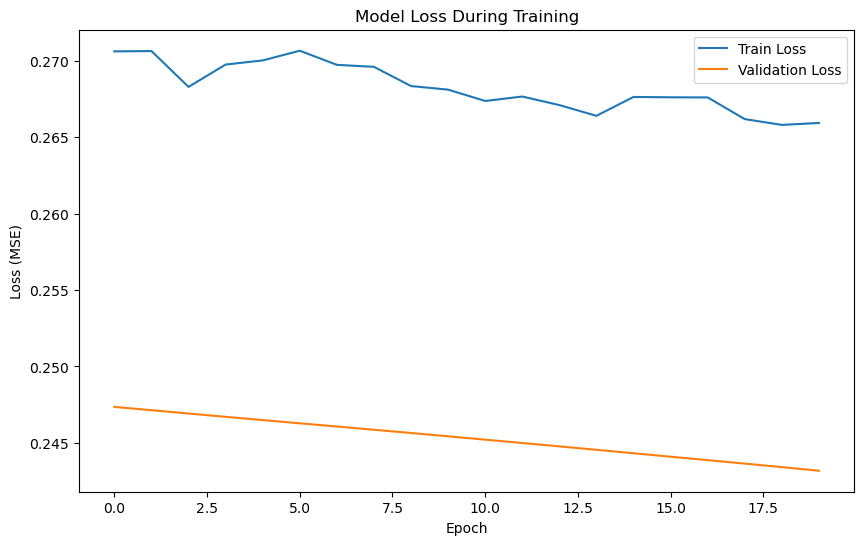

In [86]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(lstm_histroy2.history['loss'], label='Train Loss')
plt.plot(lstm_histroy2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step


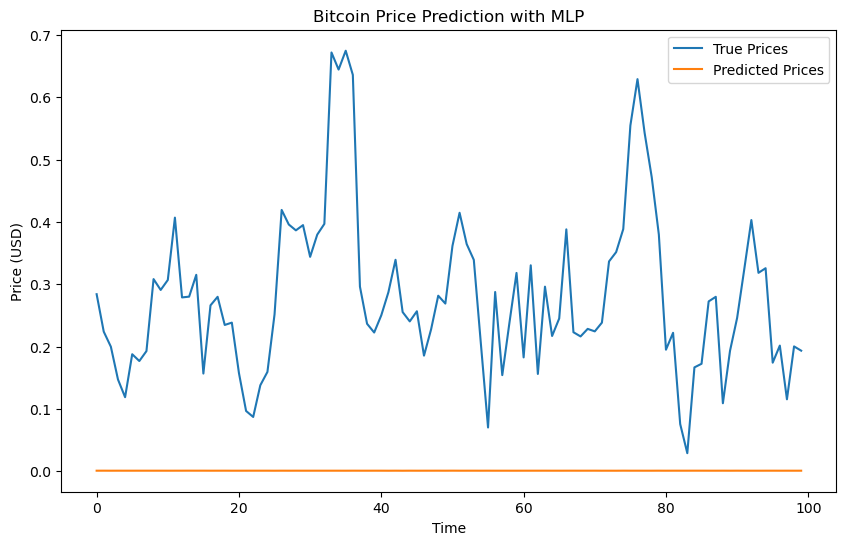

In [87]:
why_pred = lstm_model2.predict(X_test_lstm2)
y_pred = scaler_output.inverse_transform(y_pred)


plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm2, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Out-of-sample R-squared: -1170943.3626435024
Strategy Return = 1.9987702369689941 %
Buy and Hold Return = 2.0203471183776855 %


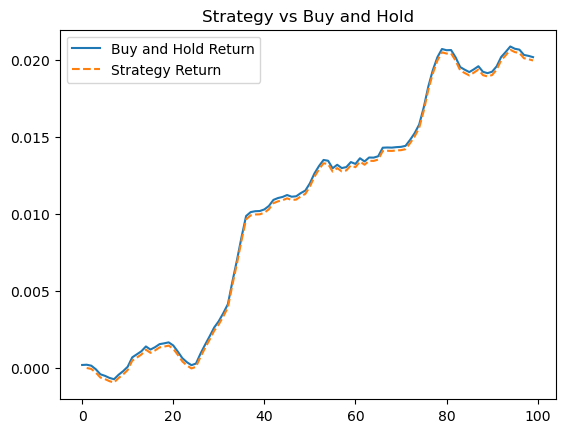

In [88]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = lstm_model2.predict(X_test_lstm2)  # MLP model prediction
y_test_pred = scaler_output2l.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test_lstm2[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output2l.inverse_transform(y_test_lstm2)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()

**2biii.**

**CNN**

In [89]:
import numpy as np
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Reset index for data
data_step2.reset_index(inplace=True, drop=True)

# Preprocessing: Scale the data
scaler_input2c = MinMaxScaler(feature_range=(-1, 1))
scaler_output2c = MinMaxScaler(feature_range=(-1, 1))

X_scaled2 = scaler_input2c.fit_transform(X2)
y_scaled2 = scaler_output2c.fit_transform(y2.values.reshape(-1, 1))

# Function to convert time series to GAF (Gramian Angular Field)
def time_series_to_gaf(X, method='summation'):
    gaf = GramianAngularField(image_size=X2.shape[1], method=method)
    X_gaf = gaf.fit_transform(X)
    return X_gaf

# Walk-forward validation function modified for CNN with GAF input data
def walk_forward_validation_cnn_gaf(X_scaled, y_scaled, window_size, test_size):
    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train_cnn = X_scaled[i - window_size:i]
        y_train_cnn = y_scaled[i - window_size:i]

        X_test_cnn = X_scaled[i:i + test_size]
        y_test_cnn = y_scaled[i:i + test_size]

        # Convert time series to GAF (Gramian Angular Field) images
        X_train_gaf = time_series_to_gaf(X_train_cnn)
        X_test_gaf = time_series_to_gaf(X_test_cnn)

        # Reshape for CNN: (samples, height, width, channels)
        X_train_cnn = X_train_gaf.reshape(X_train_gaf.shape[0], X_train_gaf.shape[1], X_train_gaf.shape[2], 1)  # 1 channel for grayscale
        X_test_cnn = X_test_gaf.reshape(X_test_gaf.shape[0], X_test_gaf.shape[1], X_test_gaf.shape[2], 1)

        yield X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn

# Set parameters for walk-forward validation
window_size = 500  # Size of the training window
test_window_size = 100  # Size of the test window

# Loop through each fold in walk-forward validation
for X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn in walk_forward_validation_cnn_gaf(X_scaled2, y_scaled2, window_size, test_window_size):

    # Initialize CNN model inside the loop where X_train_cnn is available
    cnn_model2 = tf.keras.Sequential()
    cnn_model2.add(tf.keras.layers.InputLayer(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], X_train_cnn.shape[3])))
    cnn_model2.add(tf.keras.layers.Conv2D(90, 3, activation="relu", padding="same"))
    cnn_model2.add(tf.keras.layers.MaxPooling2D(2))
    cnn_model2.add(tf.keras.layers.Conv2D(85, 3, activation="relu", padding="same"))
    cnn_model2.add(tf.keras.layers.Conv2D(60, 3, activation="relu", padding="same"))
    cnn_model2.add(tf.keras.layers.Flatten())
    cnn_model2.add(tf.keras.layers.Dense(32, activation="relu"))
    cnn_model2.add(tf.keras.layers.Dropout(0.5, seed=1234))
    cnn_model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    # Compile the model
    hp_lr = 1e-5
    cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error")

    # Early stopping callback
    es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True)

    # Train the CNN model
    cnn_history2 = cnn_model2.fit(
        X_train_cnn,
        y_train_cnn,
        epochs=100,
        batch_size=64,
        verbose=1,
        validation_split = 0.2,
        callbacks=[es]
    )

    # Evaluate the model
    loss = cnn_model2.evaluate(X_test_cnn, y_test_cnn, verbose=1)
    print(f"Test Loss: {loss}")


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - loss: 0.1411 - val_loss: 0.0818
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - loss: 0.1150 - val_loss: 0.0634
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 0.1103 - val_loss: 0.0615
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 952ms/step - loss: 0.1093 - val_loss: 0.0620
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 938ms/step - loss: 0.1054 - val_loss: 0.0619
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step - loss: 0.1092 - val_loss: 0.0629
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 866ms/step - loss: 0.1036 - val_loss: 0.0618
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - loss: 0.1053 - val_loss: 0.0617
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 831ms/step - loss: 0.1033 - val_loss: 0.0631
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 812ms/step - loss: 0.1055 - val_loss: 0.0617
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.1104 - val_loss: 0.0625
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - loss: 0.1001 - val_

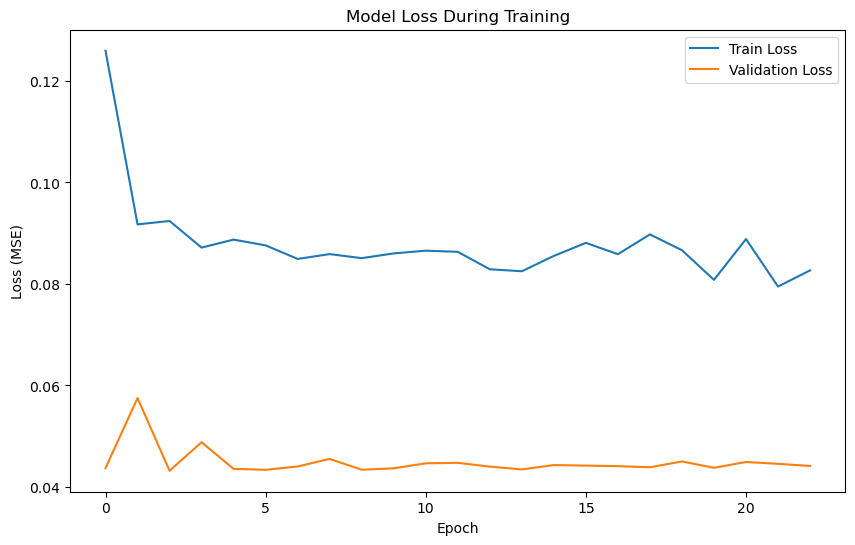

In [90]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(cnn_history2.history['loss'], label='Train Loss')
plt.plot(cnn_history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


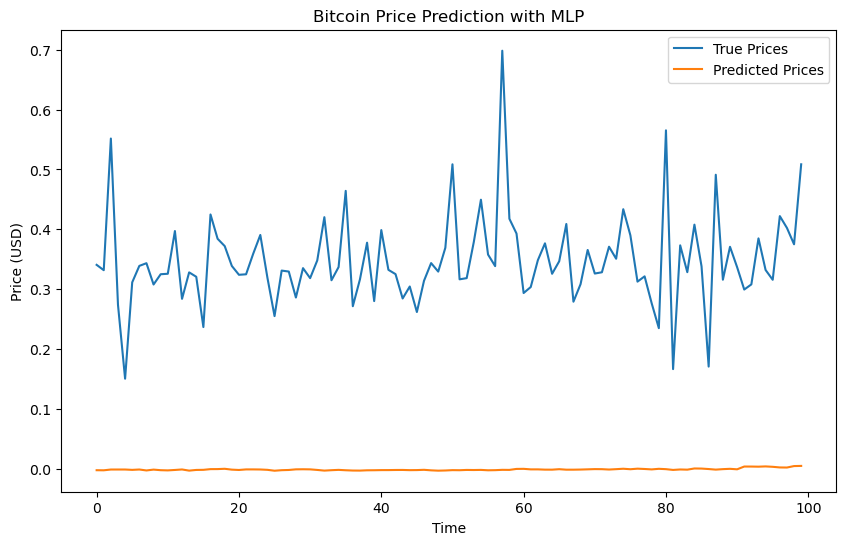

In [91]:
y_pred = cnn_model2.predict(X_test_cnn)
y_pred = scaler_output2c.inverse_transform(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test_cnn, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
Out-of-sample R-squared: -226.15216449767354
Strategy Return = -18.63805055618286 %
Buy and Hold Return = 61.40936613082886 %


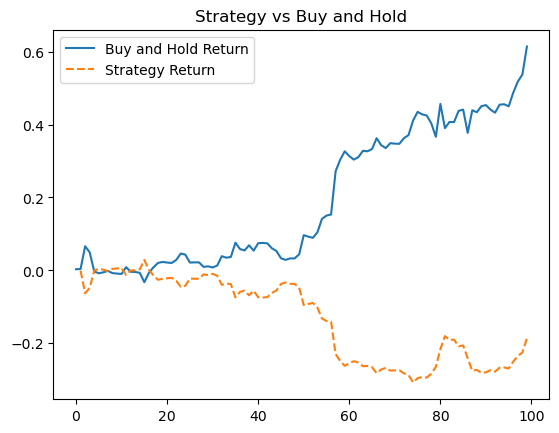

In [92]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = cnn_model2.predict(X_test_cnn)  # MLP model prediction
y_test_pred = scaler_output2c.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test_cnn[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output2c.inverse_transform(y_test_cnn)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()

# **Step 3**
## **3a**
Instead we going along with a fixed train/test split, we use walk-forward validation. In this approach, the training set grows as time progresses, but the test set is always after the training period (window). For each window, we keep the test data and never use it for training, that is our approach towards reducing leakage. We use different windows of training and test sets to ensure no overlap between the test set of the previous window and the training set of the current window. We choose a simple method to reduce leakage which is ensuring that no future data is used in the training set for labels or feature creation. So we depend on returns, high, low, volumes and past information about btc in the time frame we are working with.

In [93]:
data_step3 = btc.copy()
data_step3["Ret"] = data_step3["Adj Close"].pct_change().shift(1)
data_step3["Ret"] = data_step3["Ret"].fillna(0)

data_step3 = data_step3[["Ret", "Volume", "Adj Close", "High", "Low"]]
data_step3["Output"] = data_step3["Ret"]
del data_step3["Ret"]
data_step3.head()

Volume    Adj Close         High          Low    Output
Date                                                                   
2019-01-01  4324200990  3843.520020  3850.913818  3707.231201  0.000000
2019-01-02  5244856836  3943.409424  3947.981201  3817.409424  0.000000
2019-01-03  4530215219  3836.741211  3935.685059  3826.222900  0.025989
2019-01-04  4847965467  3857.717529  3865.934570  3783.853760 -0.027050
2019-01-05  5137609824  3845.194580  3904.903076  3836.900146  0.005467

## **3bi.** MLP with No Leakage

In [96]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Reset index for data
data_step3.reset_index(inplace=True, drop=True)

### Parameters for walk-forward validation ###
window_size = 500  # Training window size
test_window_size = 100  # Test window size for Part c
val_split = 0.4

# X and y from the dataset (assuming X is features and y is target)
Xdata, ydata = data_step3.iloc[:, 1:-1], data_step3.iloc[:, -1]
X = Xdata.astype("float32")
y = ydata.astype("float32")

# Scale data
scaler_input3 = MinMaxScaler(feature_range=(-1, 1))
scaler_output3 = MinMaxScaler(feature_range=(-1, 1))

X_scaled3 = scaler_input3.fit_transform(X)
y_scaled3 = scaler_output3.fit_transform(y.values.reshape(-1, 1))

# Walk-forward validation function
def walk_forward_validation(X_scaled, y_scaled, window_size, test_size=100):
    # Split dataset into multiple windows
    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train3 = X_scaled[i - window_size:i]
        y_train3 = y_scaled[i - window_size:i]

        X_test3 = X_scaled[i:i + test_size]
        y_test3 = y_scaled[i:i + test_size]

        yield X_train3, y_train3, X_test3, y_test3


#Validation and early stoppage
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

# Loop through each fold in walk-forward validation
for X_train3, y_train3, X_test3, y_test3 in walk_forward_validation(X_scaled3, y_scaled3, window_size):

    # Dynamically create the MLP model based on input shape
    mlp_model3 = Sequential()
    mlp_model3.add(Dense(90, activation='relu', input_shape=(X_train3.shape[1],)))  # Input shape is defined based on X_train3
    mlp_model3.add(Dropout(0.2))
    mlp_model3.add(Dense(85, activation='relu'))
    mlp_model3.add(Dropout(0.2))
    mlp_model3.add(Dense(60, activation='relu'))
    mlp_model3.add(Dropout(0.2))
    mlp_model3.add(Dense(32, activation='relu'))
    mlp_model3.add(Dropout(0.2))
    mlp_model3.add(Dense(16, activation='relu'))
    mlp_model3.add(Dense(1, activation="sigmoid"))

    # Compile the model
    hp_lr = 1e-5
    adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)
    mlp_model3.compile(optimizer=adam, loss="mean_squared_error")

    # Train the model
    mlp_histroy3 = mlp_model3.fit(
        X_train3,
        y_train3,
        validation_split=val_split,
        epochs=100,
        batch_size=64,
        verbose=2,
        callbacks=[es],
    )

    # Evaluate the model
    loss = mlp_model3.evaluate(X_test3, y_test3, verbose=0)
    print(f"Test Loss: {loss}")


Epoch 1/100
5/5 - 4s - 737ms/step - loss: 0.0428 - val_loss: 0.0518
Epoch 2/100
5/5 - 0s - 28ms/step - loss: 0.0422 - val_loss: 0.0516
Epoch 3/100
5/5 - 0s - 23ms/step - loss: 0.0424 - val_loss: 0.0515
Epoch 4/100
5/5 - 0s - 23ms/step - loss: 0.0415 - val_loss: 0.0514
Epoch 5/100
5/5 - 0s - 21ms/step - loss: 0.0424 - val_loss: 0.0512
Epoch 6/100
5/5 - 0s - 25ms/step - loss: 0.0420 - val_loss: 0.0511
Epoch 7/100
5/5 - 0s - 22ms/step - loss: 0.0421 - val_loss: 0.0509
Epoch 8/100
5/5 - 0s - 25ms/step - loss: 0.0408 - val_loss: 0.0508
Epoch 9/100
5/5 - 0s - 22ms/step - loss: 0.0415 - val_loss: 0.0506
Epoch 10/100
5/5 - 0s - 28ms/step - loss: 0.0406 - val_loss: 0.0505
Epoch 11/100
5/5 - 0s - 21ms/step - loss: 0.0412 - val_loss: 0.0504
Epoch 12/100
5/5 - 0s - 20ms/step - loss: 0.0411 - val_loss: 0.0502
Epoch 13/100
5/5 - 0s - 21ms/step - loss: 0.0415 - val_loss: 0.0501
Epoch 14/100
5/5 - 0s - 19ms/step - loss: 0.0409 - val_loss: 0.0499
Epoch 15/100
5/5 - 0s - 21ms/step - loss: 0.0410 - val_l

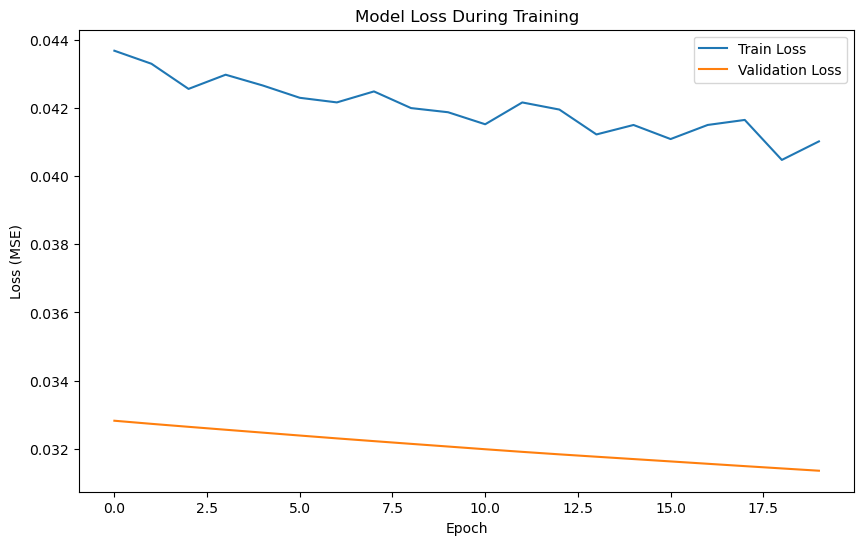

In [98]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(mlp_histroy3.history['loss'], label='Train Loss')
plt.plot(mlp_histroy3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


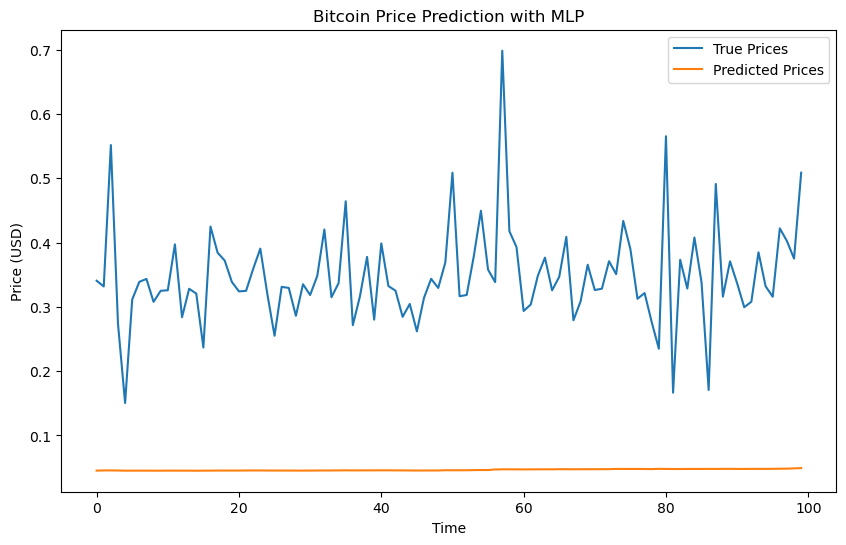

In [99]:
y_pred = mlp_model3.predict(X_test3)
y_pred = scaler_output3.inverse_transform(y_pred)


plt.figure(figsize=(10, 6))
plt.plot(y_test3, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Out-of-sample R-squared: -529.5298891194091
Strategy Return = 60.90675592422485 %
Buy and Hold Return = 61.40936613082886 %


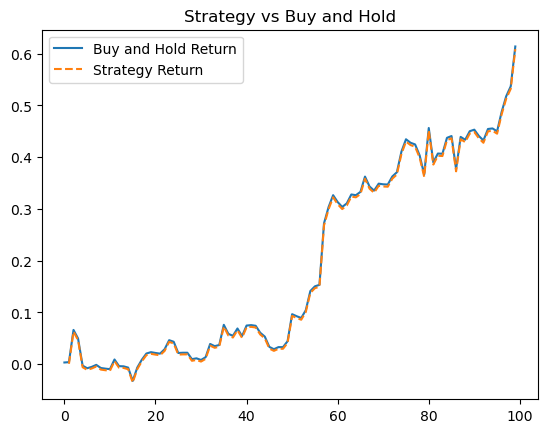

In [100]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = mlp_model3.predict(X_test3)  # MLP model prediction
y_test_pred = scaler_output3.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test3[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output3.inverse_transform(y_test3)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()


## **3bii.** LSTM with No Leakage

In [104]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import Sequential

# Walk-forward validation function modified for LSTM input data
scaler_input3l = MinMaxScaler(feature_range=(-1, 1))
scaler_output3l = MinMaxScaler(feature_range=(-1, 1))

X_scaled3 = scaler_input3l.fit_transform(X)
y_scaled3 = scaler_output3l.fit_transform(y.values.reshape(-1, 1))

# Walk-forward validation function modified for LSTM input data
def walk_forward_validation_lstm(X_scaled, y_scaled, window_size, test_size):
    timesteps = 1  # Assuming 1 timestep for each instance
    features = X_scaled.shape[1]  # Correctly set features

    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train_lstm3 = X_scaled[i - window_size:i]
        y_train_lstm3 = y_scaled[i - window_size:i]

        X_test_lstm3 = X_scaled[i:i + test_size]
        y_test_lstm3 = y_scaled[i:i + test_size]

        # Reshape for LSTM: (samples, timesteps, features)
        X_train_lstm3 = np.reshape(X_train_lstm3, (X_train_lstm3.shape[0], timesteps, features))
        X_test_lstm3 = np.reshape(X_test_lstm3, (X_test_lstm3.shape[0], timesteps, features))

        yield X_train_lstm3, y_train_lstm3, X_test_lstm3, y_test_lstm3


# Model parameters
SEED = 12345
units_lstm = 90
units_lstm_2 = 85
units_lstm_3 = 60
units_lstm_4 = 32
n_dropout = 0.20
act_fun = "relu"
n_features = X_scaled3.shape[1]  # Number of input features

# Modify your model definition to use the correct input shape
lstm_model3 = Sequential()

lstm_model3.add(
    LSTM(
        units=units_lstm,
        return_sequences=True,
        activation="tanh",
        input_shape=(1, n_features),  # timesteps=1, features=n_features
    )
)
lstm_model3.add(LSTM(units=units_lstm_2, return_sequences=True, activation="tanh"))
lstm_model3.add(Dropout(n_dropout, seed=SEED))

lstm_model3.add(LSTM(units=units_lstm_3, return_sequences=True, activation="tanh"))
lstm_model3.add(Dropout(n_dropout, seed=SEED))

lstm_model3.add(LSTM(units=units_lstm_4, return_sequences=False, activation="tanh"))
lstm_model3.add(Dropout(n_dropout, seed=SEED))

lstm_model3.add(Dense(units=16, activation=act_fun))
lstm_model3.add(Dropout(n_dropout, seed=SEED))

lstm_model3.add(Dense(units=10, activation=act_fun))
lstm_model3.add(Dropout(n_dropout, seed=SEED))

lstm_model3.add(Dense(1, activation="sigmoid"))

# Compile the model
hp_lr = 1e-5
lstm_model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error"
)

# Early stopping
es = EarlyStopping(
    monitor="val_loss", mode="min", verbose=0, patience=20, restore_best_weights=True
)

# Set parameters for walk-forward validation
window_size = 500  # Size of the training window
test_window_size = 100  # Size of the test window

# Loop through each fold in walk-forward validation
for X_train_lstm3, y_train_lstm3, X_test_lstm3, y_test_lstm3 in walk_forward_validation_lstm(X_scaled3, y_scaled3, window_size, test_window_size):

    lstm_histroy3 = lstm_model3.fit(
        X_train_lstm3,
        y_train_lstm3,
        validation_split=0.2,  # Use 20% of the training data for validation
        epochs=100,
        batch_size=64,
        verbose=2,
        callbacks=[es],
    )

    # Evaluate the model
    loss = lstm_model3.evaluate(X_test_lstm3, y_test_lstm3, verbose=0)
    print(f"Test Loss: {loss}")


Epoch 1/100
7/7 - 12s - 2s/step - loss: 0.1793 - val_loss: 0.1968
Epoch 2/100
7/7 - 0s - 23ms/step - loss: 0.1792 - val_loss: 0.1968
Epoch 3/100
7/7 - 0s - 21ms/step - loss: 0.1791 - val_loss: 0.1967
Epoch 4/100
7/7 - 0s - 20ms/step - loss: 0.1791 - val_loss: 0.1966
Epoch 5/100
7/7 - 0s - 28ms/step - loss: 0.1790 - val_loss: 0.1966
Epoch 6/100
7/7 - 0s - 23ms/step - loss: 0.1789 - val_loss: 0.1965
Epoch 7/100
7/7 - 0s - 30ms/step - loss: 0.1789 - val_loss: 0.1964
Epoch 8/100
7/7 - 0s - 25ms/step - loss: 0.1787 - val_loss: 0.1963
Epoch 9/100
7/7 - 0s - 23ms/step - loss: 0.1786 - val_loss: 0.1962
Epoch 10/100
7/7 - 0s - 24ms/step - loss: 0.1786 - val_loss: 0.1961
Epoch 11/100
7/7 - 0s - 20ms/step - loss: 0.1785 - val_loss: 0.1960
Epoch 12/100
7/7 - 0s - 19ms/step - loss: 0.1784 - val_loss: 0.1959
Epoch 13/100
7/7 - 0s - 22ms/step - loss: 0.1783 - val_loss: 0.1959
Epoch 14/100
7/7 - 0s - 19ms/step - loss: 0.1782 - val_loss: 0.1958
Epoch 15/100
7/7 - 0s - 27ms/step - loss: 0.1781 - val_los

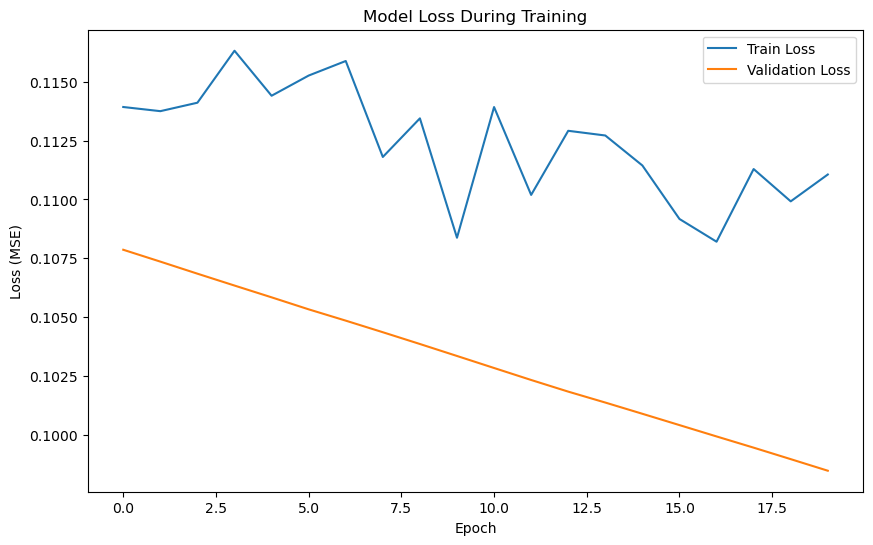

In [105]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(lstm_histroy3.history['loss'], label='Train Loss')
plt.plot(lstm_histroy3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step


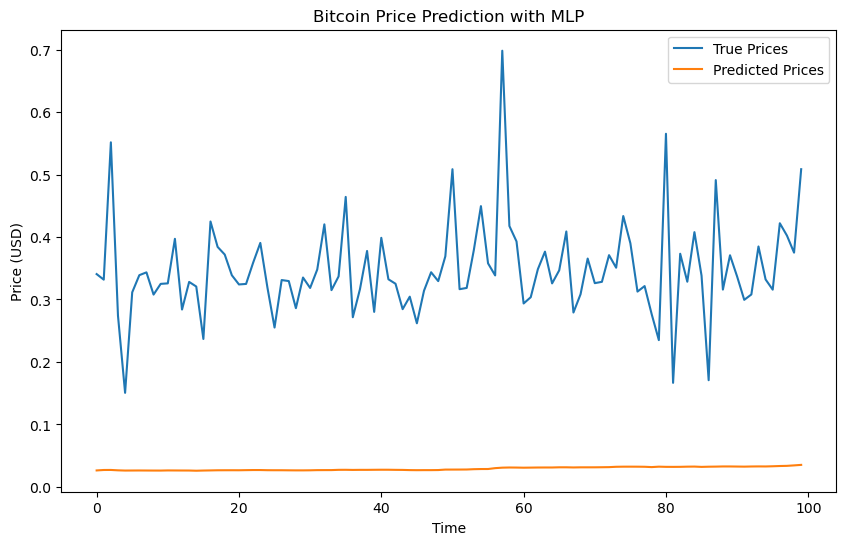

In [106]:
y_pred = lstm_model3.predict(X_test_lstm3)
y_pred = scaler_output3l.inverse_transform(y_pred)


plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Out-of-sample R-squared: -403.3333369702422
Strategy Return = 60.90675592422485 %
Buy and Hold Return = 61.40936613082886 %


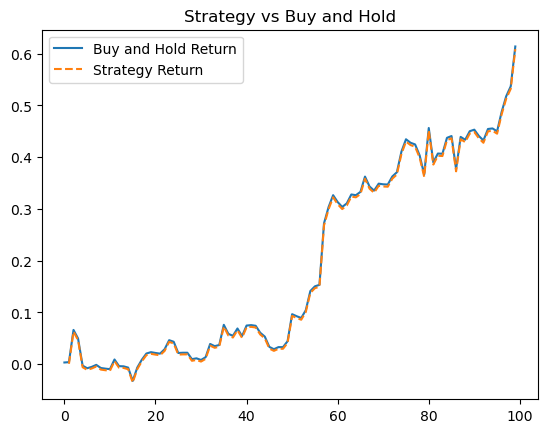

In [107]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = lstm_model3.predict(X_test_lstm3)  # MLP model prediction
y_test_pred = scaler_output3l.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test_lstm3[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output3l.inverse_transform(y_test_lstm3)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()

## **3biii.** CNN with No Leakage

In [111]:
import numpy as np
from pyts.image import GramianAngularField


# Walk-forward validation function modified for LSTM input data
scaler_input3c = MinMaxScaler(feature_range=(-1, 1))
scaler_output3c = MinMaxScaler(feature_range=(-1, 1))

X_scaled3 = scaler_input3c.fit_transform(X)
y_scaled3 = scaler_output3c.fit_transform(y.values.reshape(-1, 1))

# Function to convert time series to GAF
def time_series_to_gaf(X, method='summation'):
    gaf = GramianAngularField(image_size=X.shape[1], method=method)
    X_gaf = gaf.fit_transform(X)
    return X_gaf

# Walk-forward validation function modified for CNN with GAF input data
def walk_forward_validation_cnn_gaf(X_scaled, y_scaled, window_size, test_size):
    features = X_scaled.shape[1]

    for i in range(window_size, len(X_scaled) - test_size, test_size):
        # Define train and test sets in a walk-forward manner
        X_train_cnn = X_scaled[i - window_size:i]
        y_train_cnn = y_scaled[i - window_size:i]

        X_test_cnn = X_scaled[i:i + test_size]
        y_test_cnn = y_scaled[i:i + test_size]

        # Convert time series to GAF (Gramian Angular Field) images
        X_train_gaf = time_series_to_gaf(X_train_cnn)
        X_test_gaf = time_series_to_gaf(X_test_cnn)

        # Reshape for CNN: (samples, height, width, channels)
        X_train_cnn = X_train_gaf.reshape(X_train_gaf.shape[0], X_train_gaf.shape[1], X_train_gaf.shape[2], 1)  # 1 channel for grayscale
        X_test_cnn = X_test_gaf.reshape(X_test_gaf.shape[0], X_test_gaf.shape[1], X_test_gaf.shape[2], 1)

        yield X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn


cnn_model3 = tf.keras.Sequential()
cnn_model3.add(tf.keras.layers.InputLayer(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], X_train_cnn.shape[3])))
cnn_model3.add(tf.keras.layers.Conv2D(90, 3, activation="relu", padding="same"))
cnn_model3.add(tf.keras.layers.MaxPooling2D(2))
cnn_model3.add(tf.keras.layers.Conv2D(85, 3, activation="relu", padding="same"))
#cnn_model3.add(tf.keras.layers.MaxPooling2D(2))
cnn_model3.add(tf.keras.layers.Conv2D(60, 3, activation="relu", padding="same"))
#cnn_model3.add(tf.keras.layers.MaxPooling2D(2))
cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(32, activation="relu"))
cnn_model3.add(tf.keras.layers.Dropout(0.5, seed=1234))
cnn_model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
hp_lr = 1e-5
cnn_model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error"
)


es = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

window_size = 500  # Size of the training window
test_window_size = 100  # Size of the test window

# Loop through each fold in walk-forward validation
for X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn in walk_forward_validation_cnn_gaf(X_scaled3, y_scaled3, window_size, test_window_size):

    # Train the CNN model
    cnn_history3 = cnn_model3.fit(
        X_train_cnn,
        y_train_cnn,
        epochs=100,
        batch_size=64,
        verbose=1,
        validation_data=(X_test_cnn, y_test_cnn),
        callbacks=[es]
    )

    # Evaluate the model
    loss = cnn_model3.evaluate(X_test_cnn, y_test_cnn, verbose=1)
    print(f"Test Loss: {loss}")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.1818 - val_loss: 0.1665
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1813 - val_loss: 0.1660
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1809 - val_loss: 0.1655
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1804 - val_loss: 0.1650
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1799 - val_loss: 0.1645
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1795 - val_loss: 0.1640
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1791 - val_loss: 0.1636
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1785 - val_loss: 0.1631
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1781 - val_loss: 0.1626
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1777 - val_loss: 0.1622
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1772 - val_loss: 0.1616
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1767 - val_lo

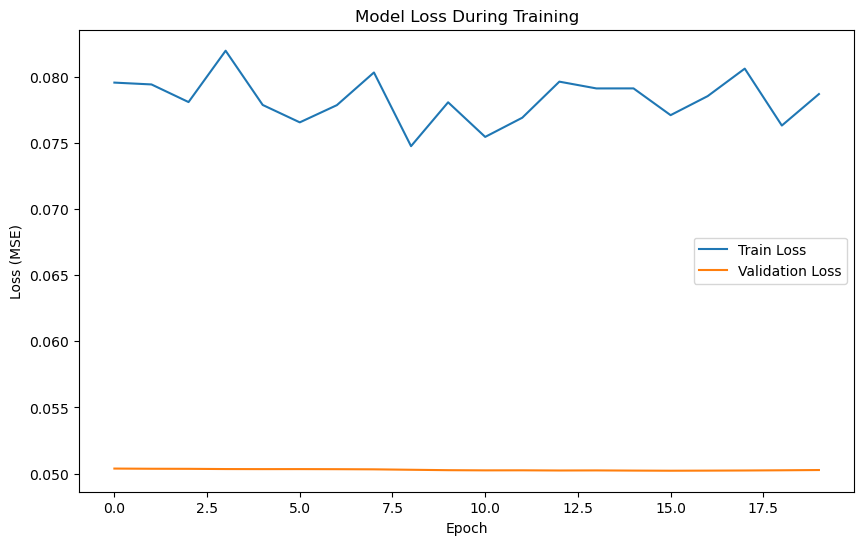

In [112]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(cnn_history3.history['loss'], label='Train Loss')
plt.plot(cnn_history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


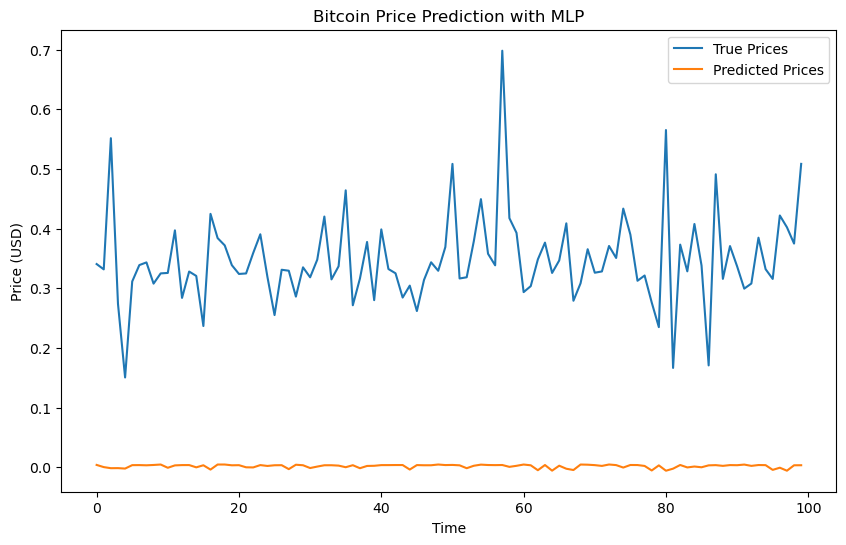

In [113]:
y_pred = cnn_model3.predict(X_test_cnn)
y_pred = scaler_output3c.inverse_transform(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test_cnn, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with MLP')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Out-of-sample R-squared: -240.73807954130103
Strategy Return = 75.71238279342651 %
Buy and Hold Return = 61.40936613082886 %


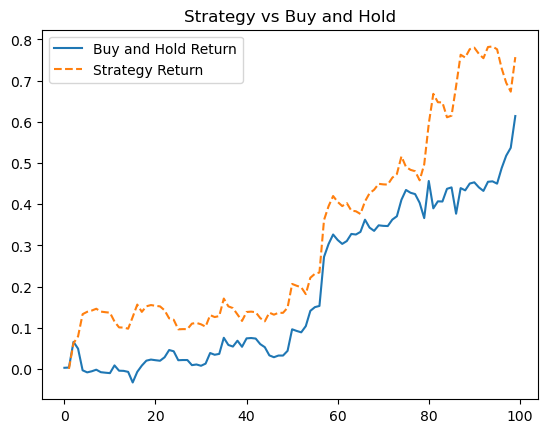

In [114]:
def R2_campbell(y_true, y_predicted, mean_ret):
    y_predicted = y_pred.reshape((-1,))
    sse = sum((y_true - y_predicted) ** 2)
    tse = sum((y_true - mean_ret) ** 2)
    r2_score = 1 - (sse / tse)

    return r2_score


# Predict using the trained MLP model
y_pred = cnn_model3.predict(X_test_cnn)  # MLP model prediction
y_test_pred = scaler_output3c.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling of predictions

# Adjust the size of y_test to match the prediction length
y_test_true = y_test_cnn[:len(y_test_pred)]  # Ensure the lengths match
y_test_true = scaler_output3c.inverse_transform(y_test_cnn)  # Inverse scaling of true values

# Flatten predictions and true values
y_test_pred = y_test_pred.flatten()
y_test_true = y_test_true.flatten()

# Calculate the mean return (mean_ret) for R2 calculation
mean_ret = np.mean(y_test_true)

# Calculate R2 Campbell for evaluation
R2_Campbell = R2_campbell(y_test_true, y_test_pred, mean_ret)
print(f'Out-of-sample R-squared: {R2_Campbell}')

# Prepare DataFrame for backtest
df_predictions = pd.DataFrame({
    "Pred MLP": y_test_pred,
    "values": y_test_true
})

# Apply trading strategy
df_predictions["Positions"] = df_predictions["Pred MLP"].apply(np.sign)
df_predictions["Strat_ret"] = df_predictions["Positions"].shift(1) * df_predictions["values"]

# Calculate cumulative returns for strategy and buy-and-hold
df_predictions["CumRet"] = df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df_predictions["bhRet"] = df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)

# Calculate final returns
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["values"]) - 1

print(f'Strategy Return =', Final_Return * 100, "%")
print(f'Buy and Hold Return =', Buy_Return * 100, "%")

# Plot cumulative returns
ax = plt.gca()
df_predictions.plot(y="bhRet", ax=ax, label='Buy and Hold Return')
df_predictions.plot(y="CumRet", ax=ax, label='Strategy Return', linestyle='--')
plt.title('Strategy vs Buy and Hold')
plt.legend()
plt.show()